In [26]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc, recall_score, confusion_matrix
import sys 
import matplotlib.lines as mlines
sys.path.append('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/')
from RF_atomver import *
import pandas as pd
import numpy as np

In [27]:
import scipy as sp
from sklearn.metrics import pairwise_distances

# ---------------------------------------------
def calc_AD_kmean_dist(train_dset, pred_dset, k, train_dset_pair_distance=None, dist_metric="euclidean"):
    """
    calculate the probability of the prediction dataset fall in the the domain of traning set. Use Euclidean distance of the K nearest neighbours.
    train_dset and pred_dset should be in 2D numpy array format where each row is a compound.
    """
    if train_dset_pair_distance is None:
        # calcualate the pairwise distance of training set
        train_dset_pair_distance = pairwise_distances(X=train_dset, metric=dist_metric)
    train_kmean_dis = []
    for i in range(len(train_dset_pair_distance)):
        kn_idx = np.argpartition(train_dset_pair_distance[i], k+1)
        dis = np.mean(train_dset_pair_distance[i][kn_idx[:k+1]])
        train_kmean_dis.append(dis)
    train_dset_distribution = sp.stats.norm.fit(train_kmean_dis)
    # pairwise distance between train and pred set
    pred_size = len(pred_dset)
    train_pred_dis = pairwise_distances(X=pred_dset, Y=train_dset, metric=dist_metric)
    pred_kmean_dis_score = np.zeros(pred_size)
    for i in range(pred_size):
        pred_km_dis = np.mean(np.sort(train_pred_dis[i])[:k])
        train_dset_std = train_dset_distribution[1] if train_dset_distribution[1] != 0 else 1e-6
        pred_kmean_dis_score[i] = max(1e-6, (pred_km_dis - train_dset_distribution[0]) / train_dset_std)
    return pred_kmean_dis_score

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


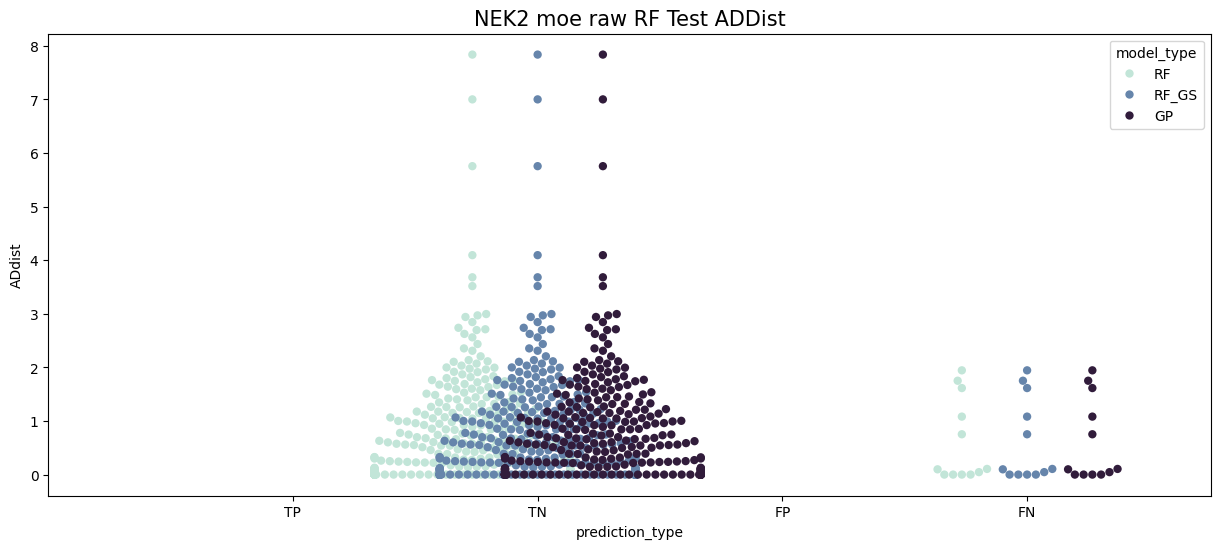

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 19.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


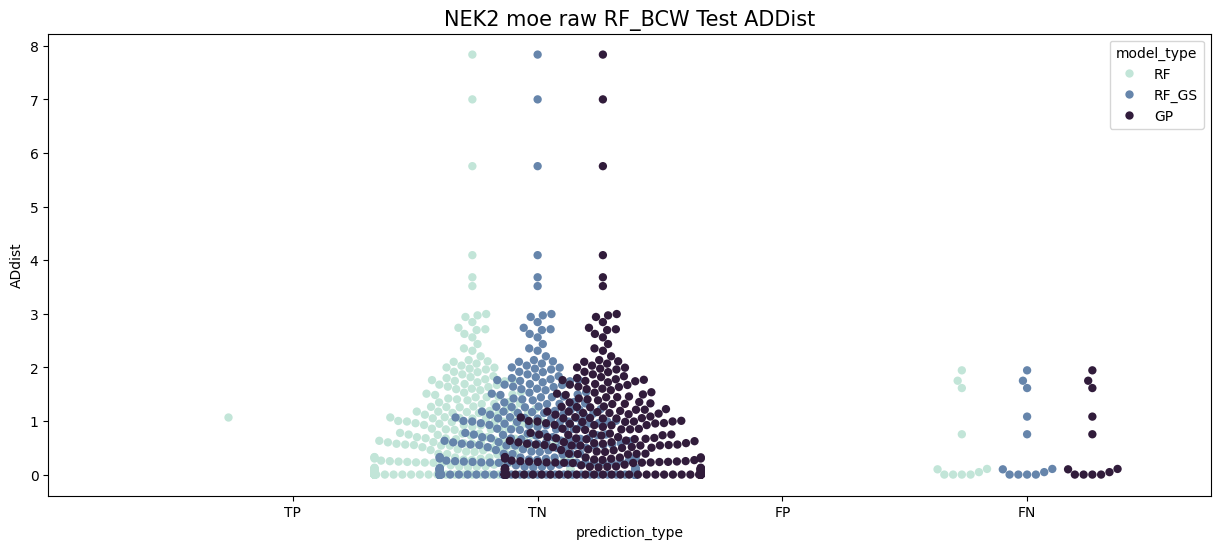

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 19.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

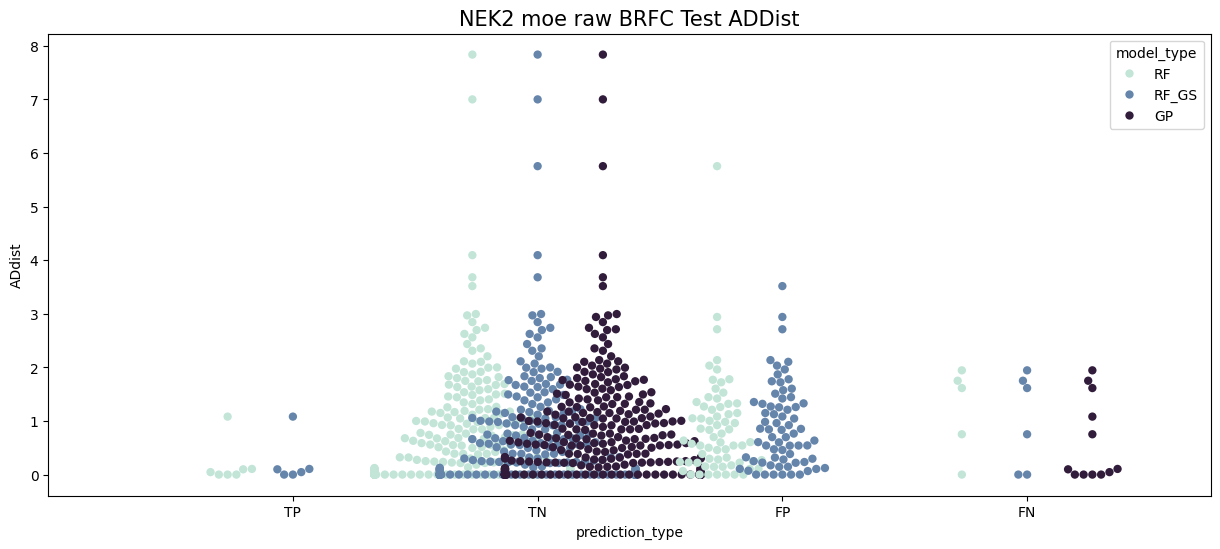

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 19.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

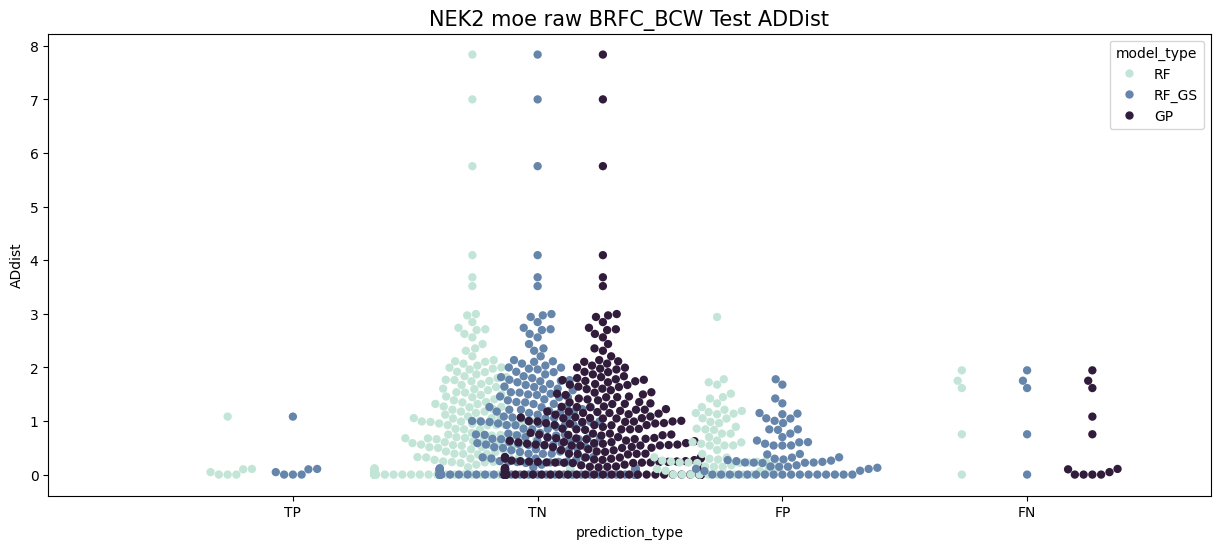

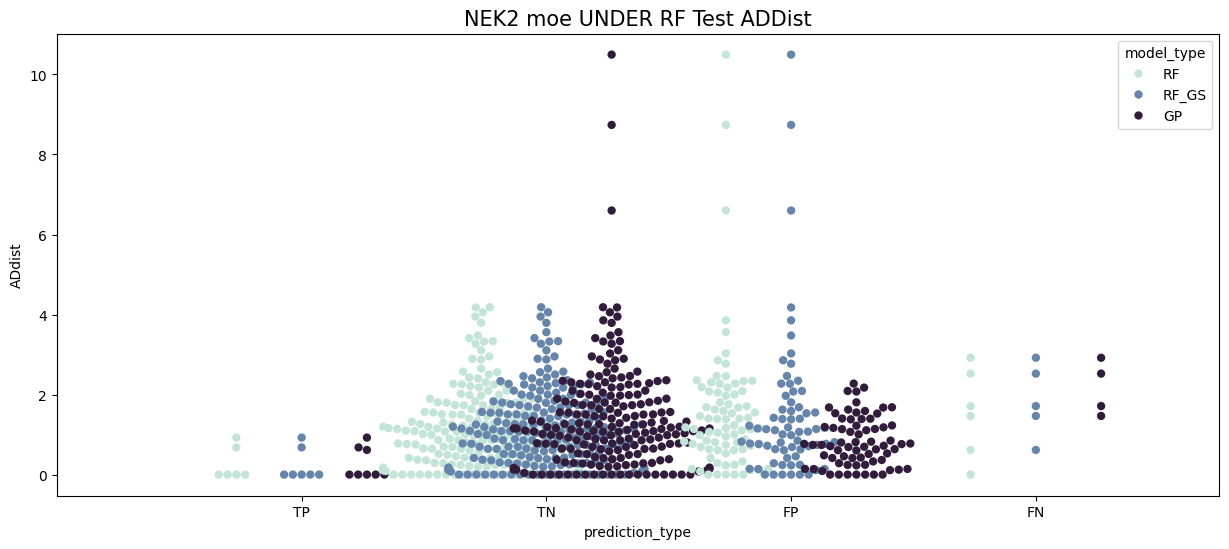

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


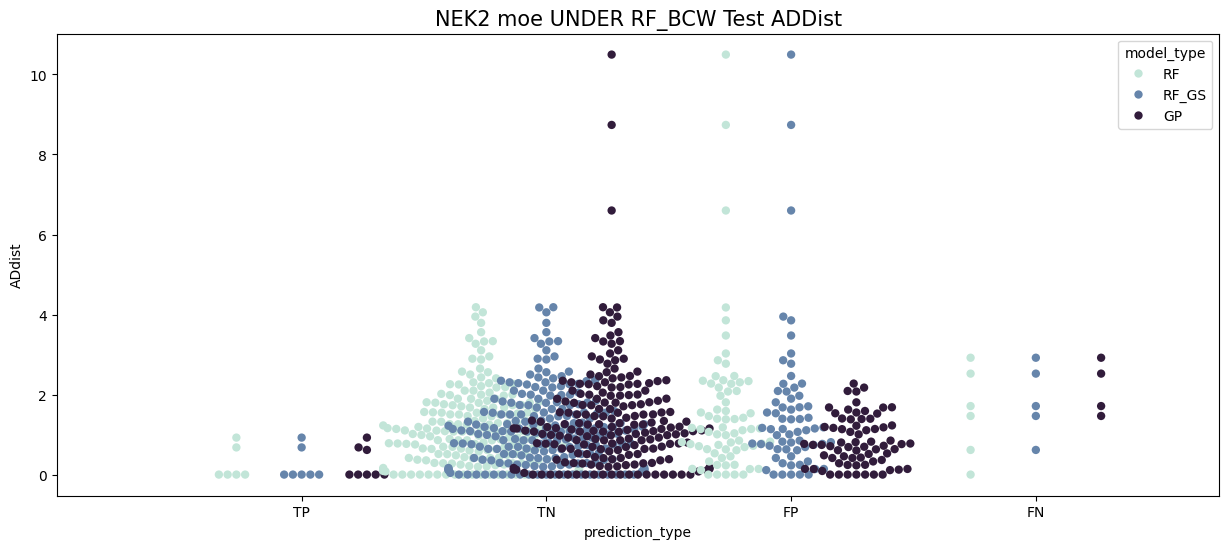

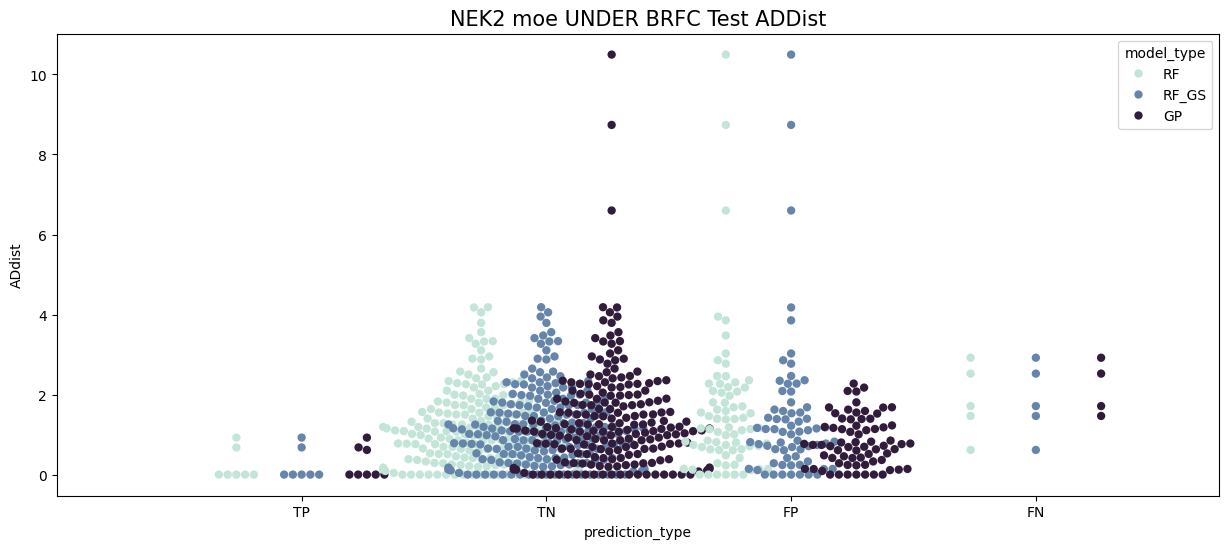

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


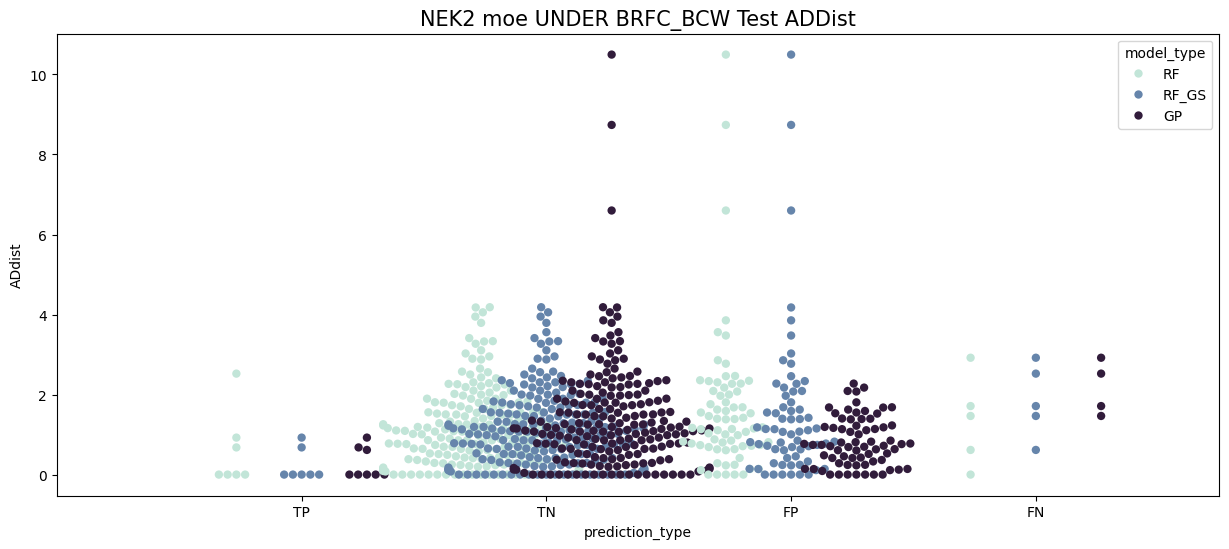

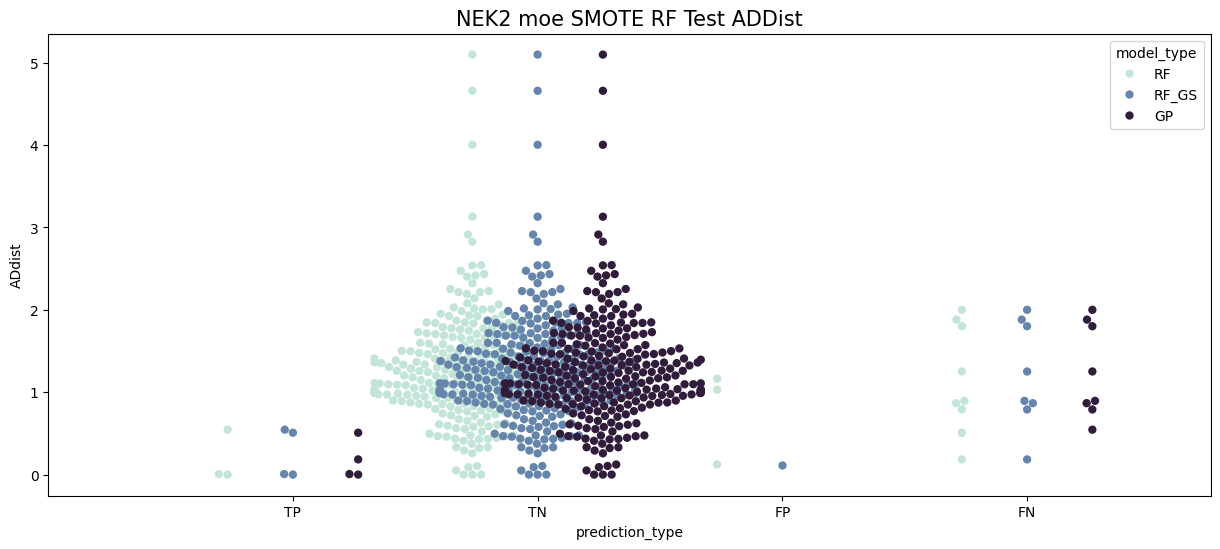

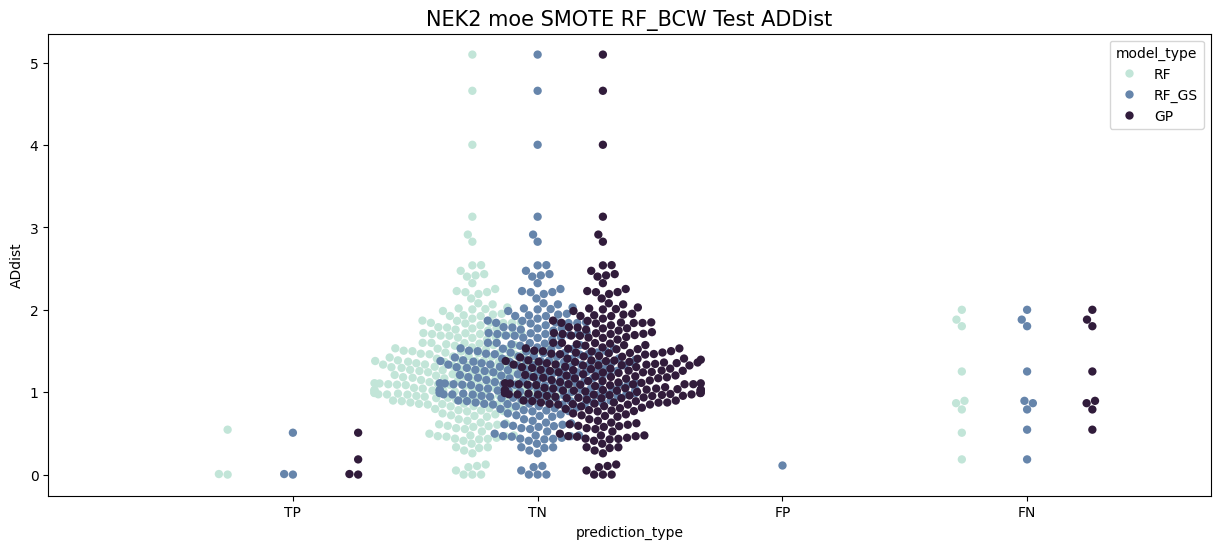

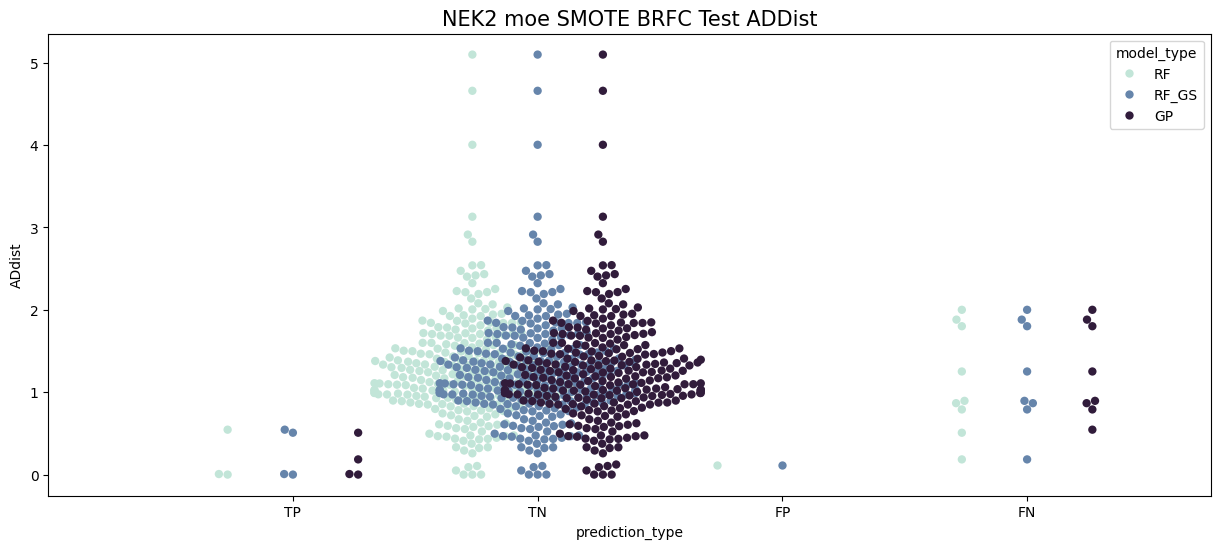

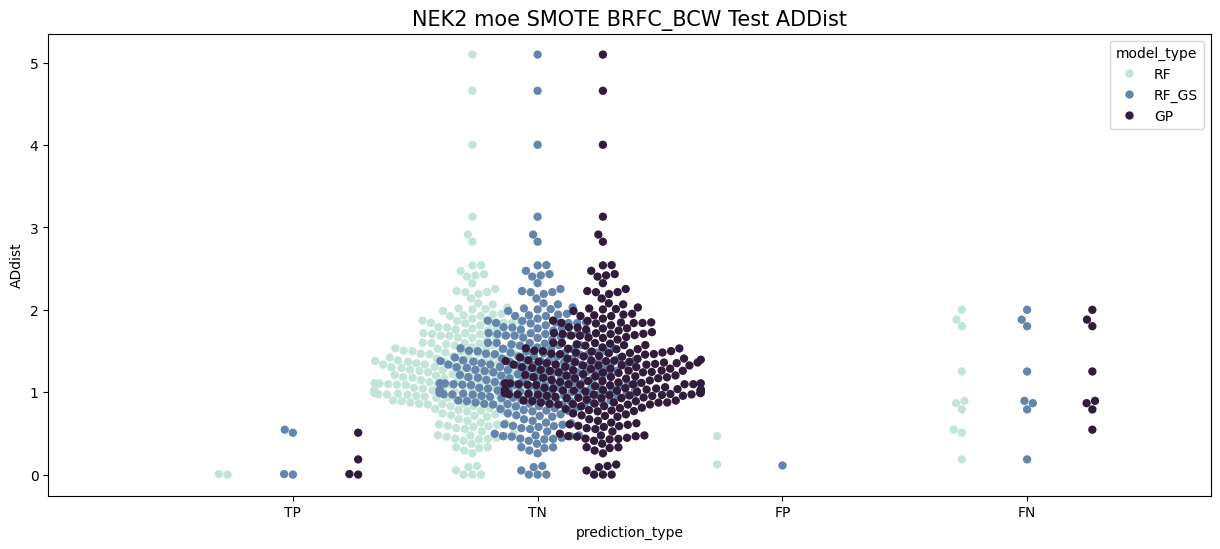

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


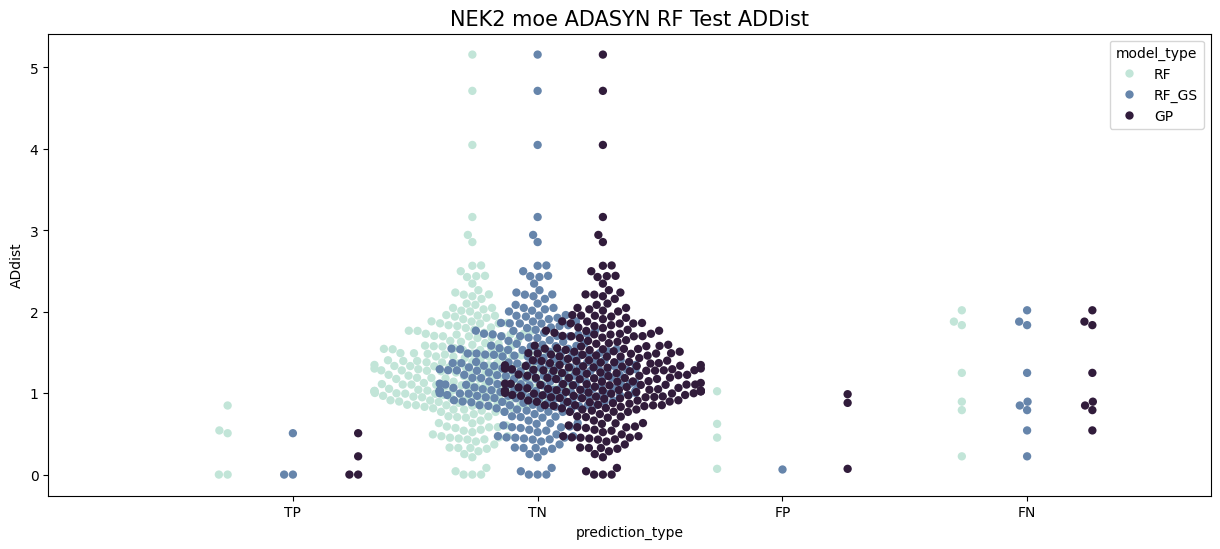

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


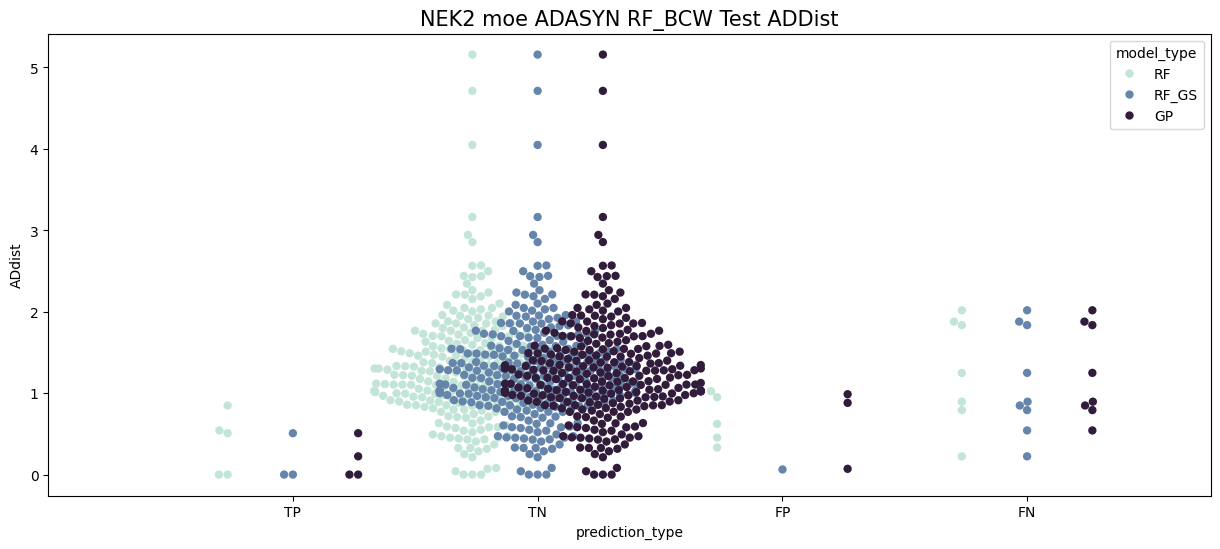

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


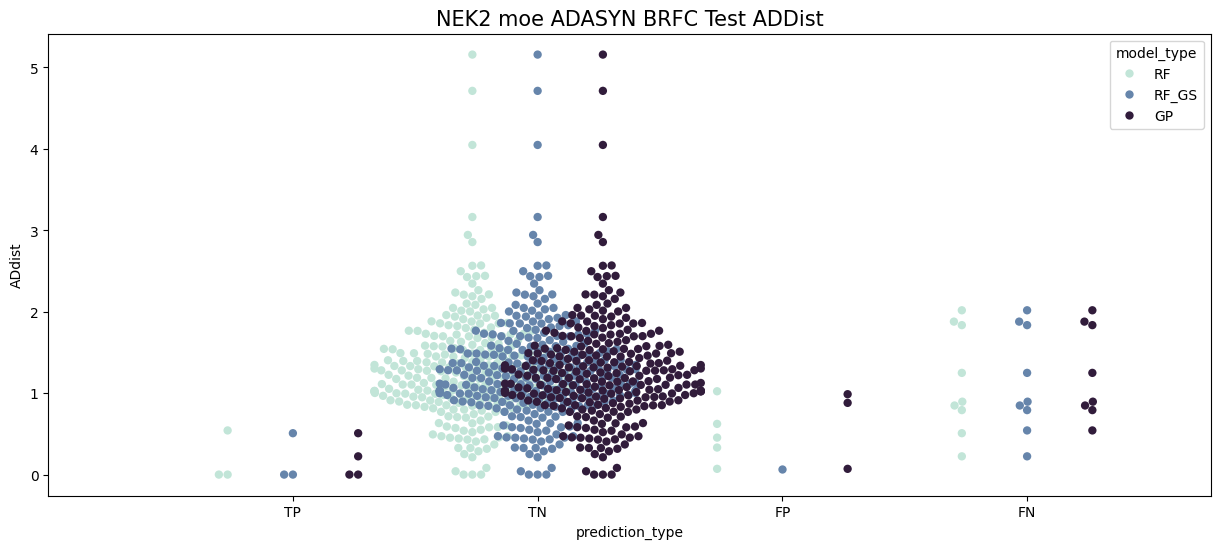

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


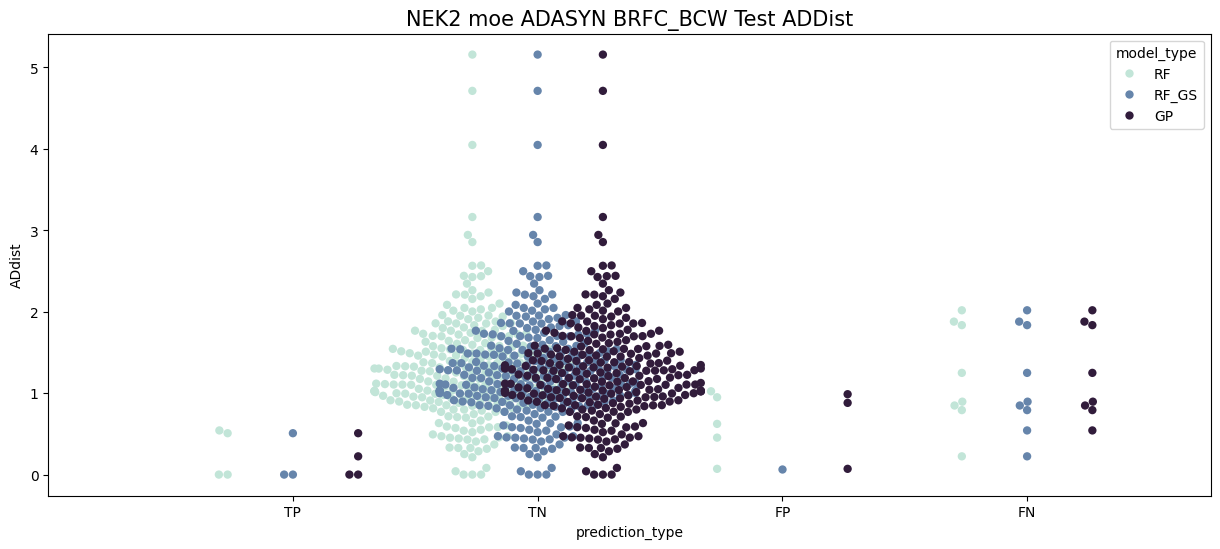

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 25.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


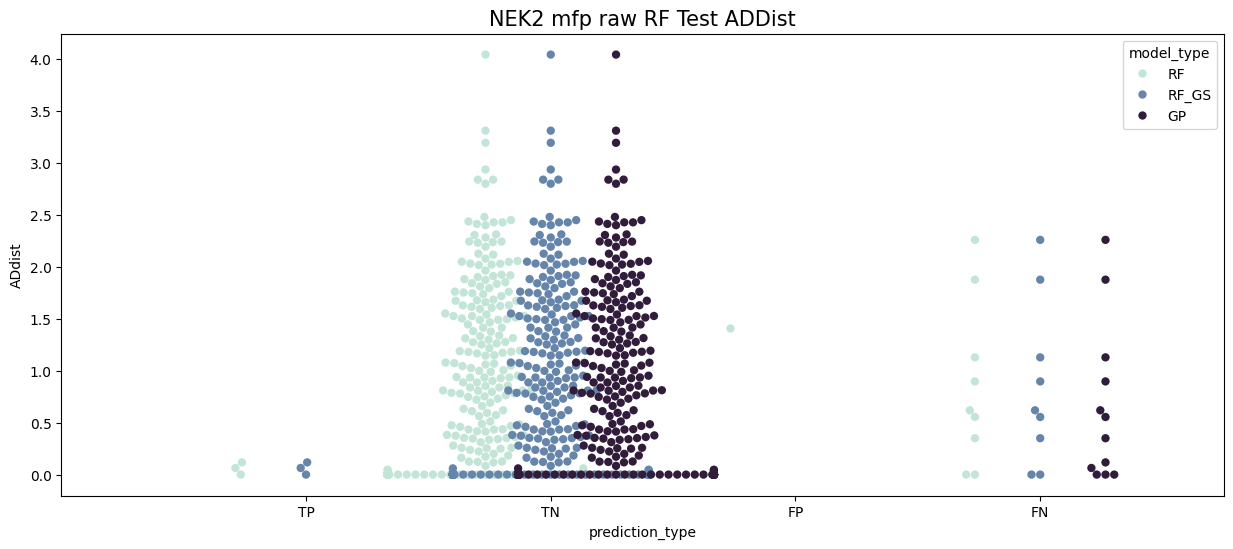

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

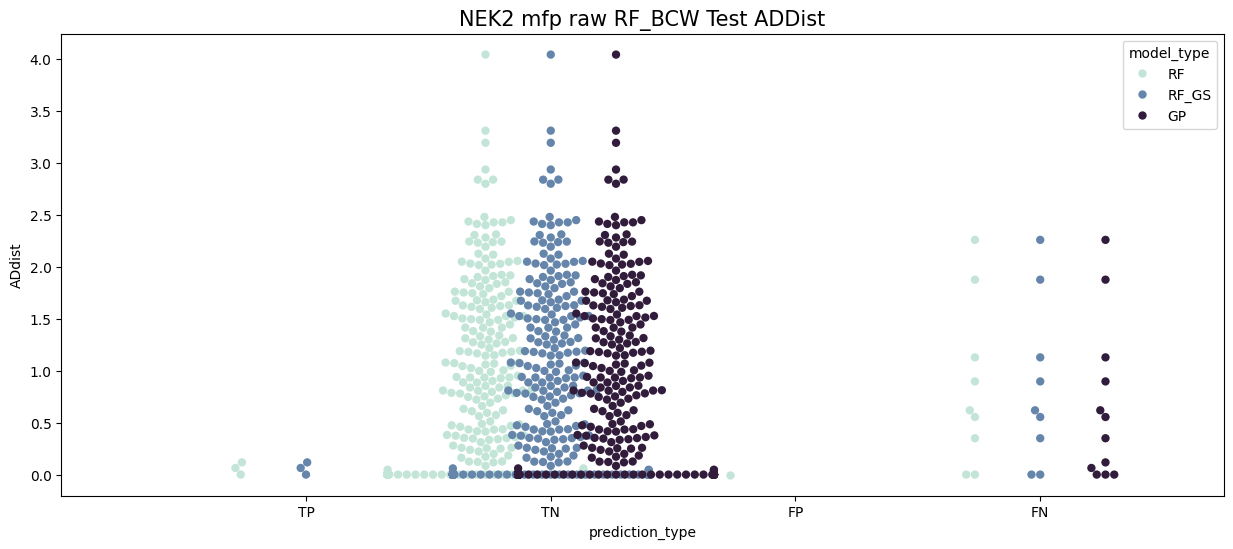

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

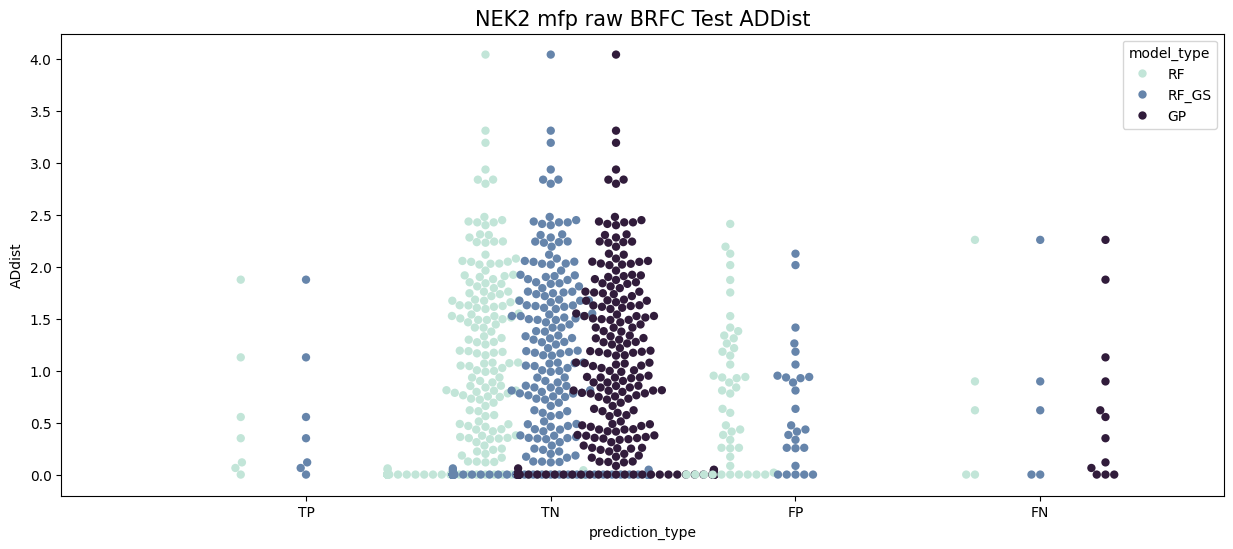

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 22.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 24.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWa

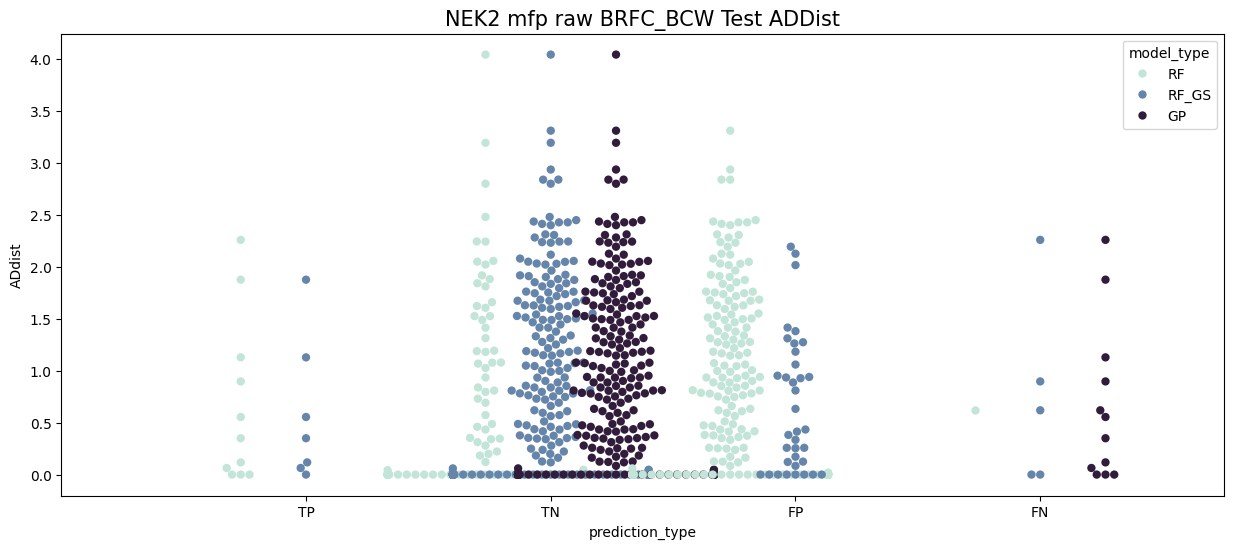

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


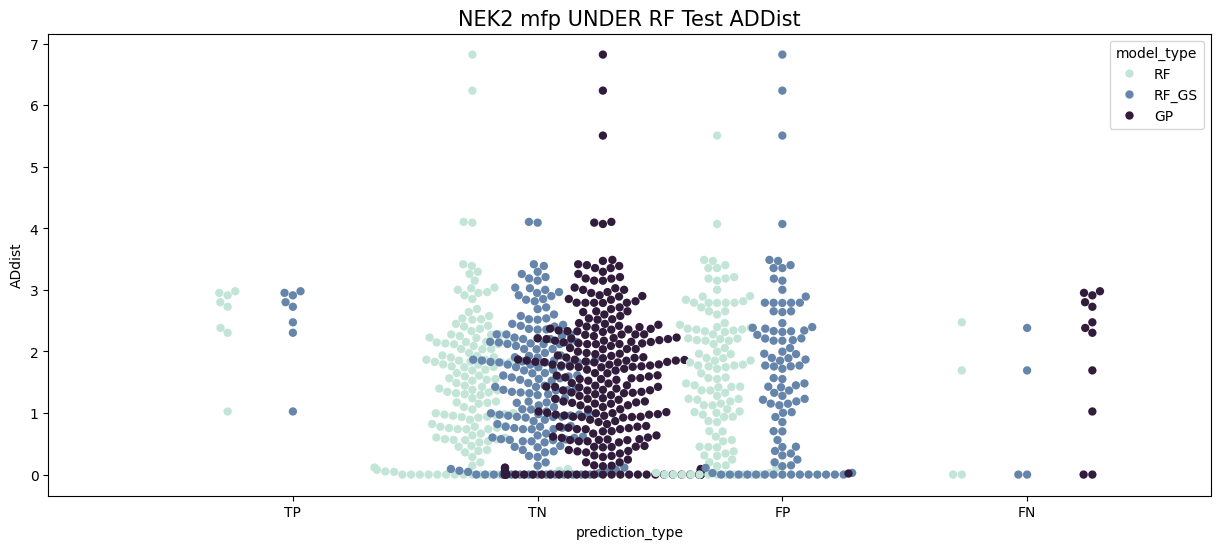

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


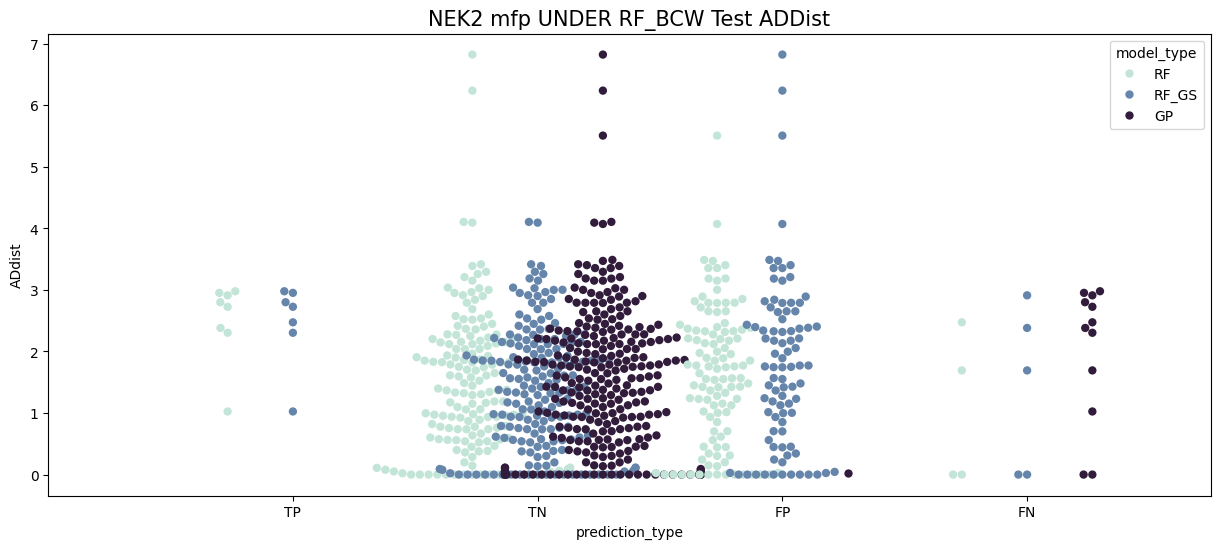

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


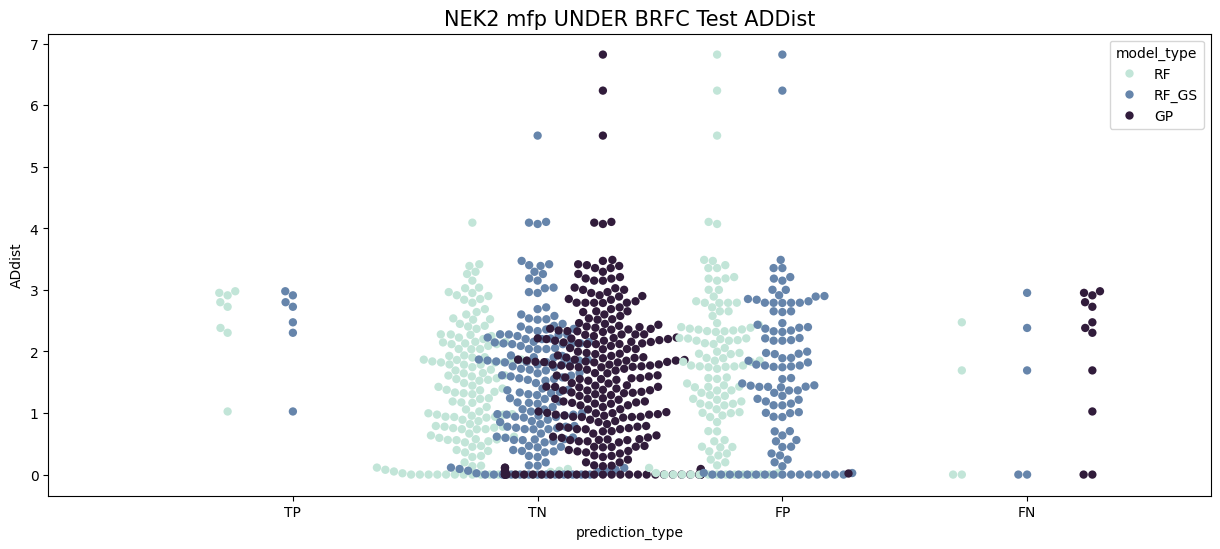

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


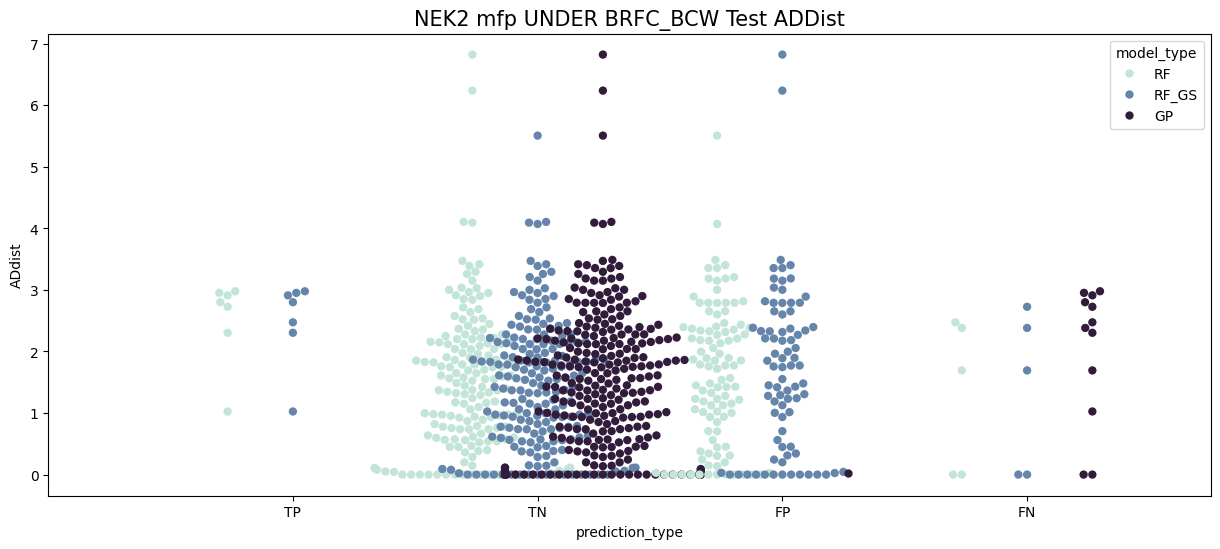

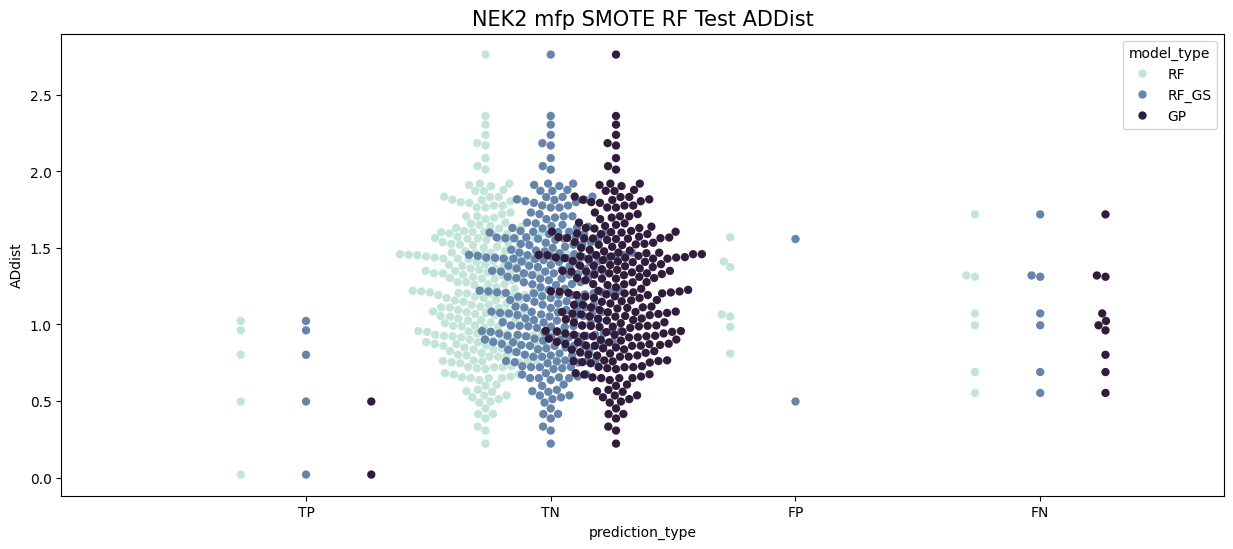

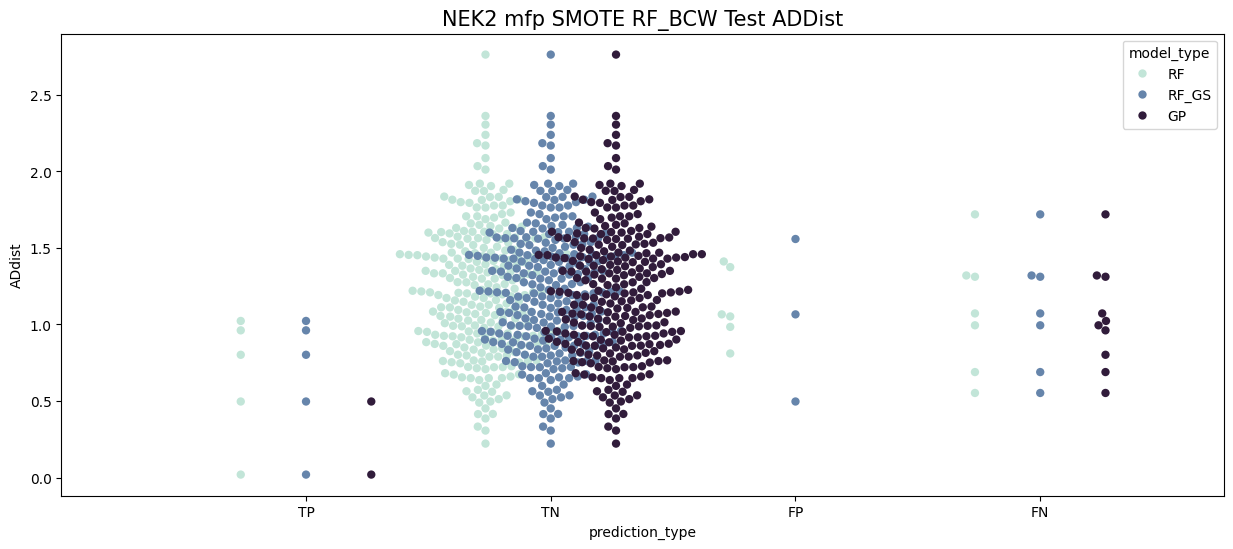

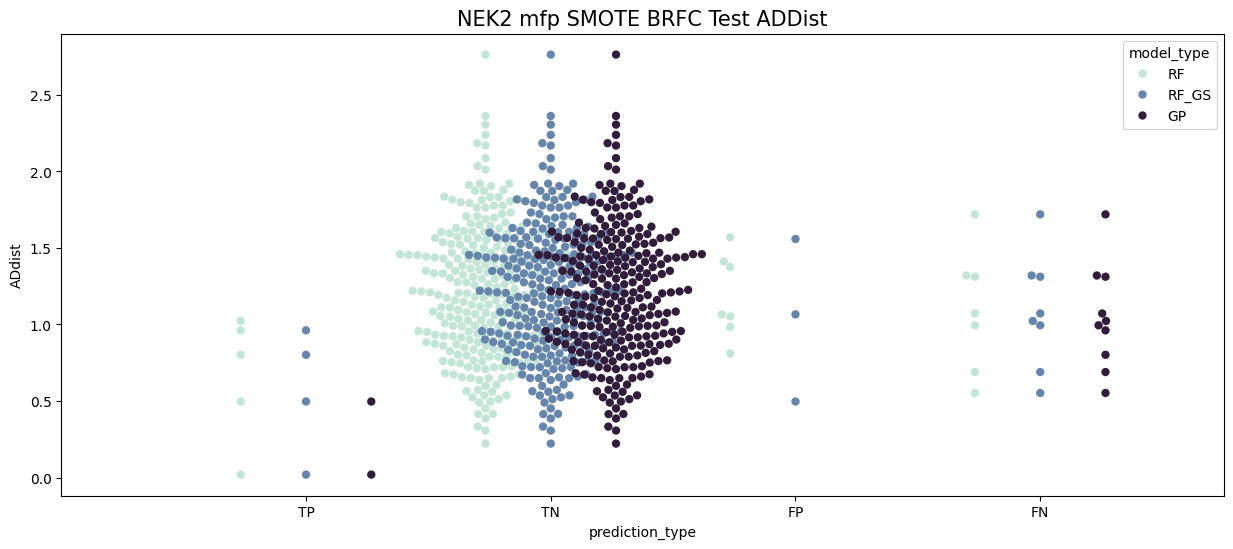

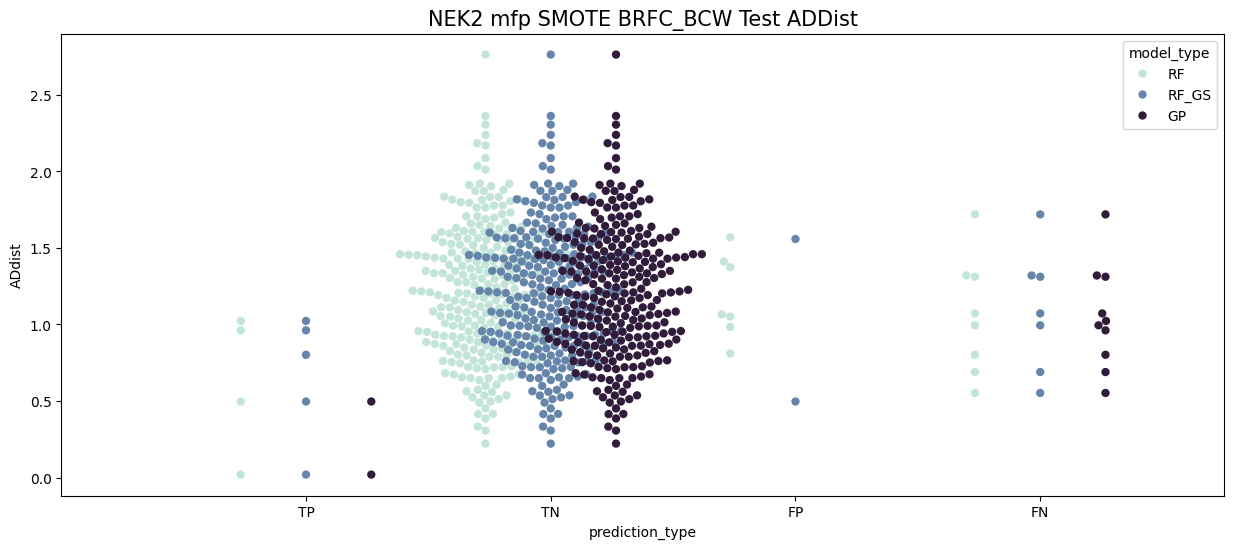

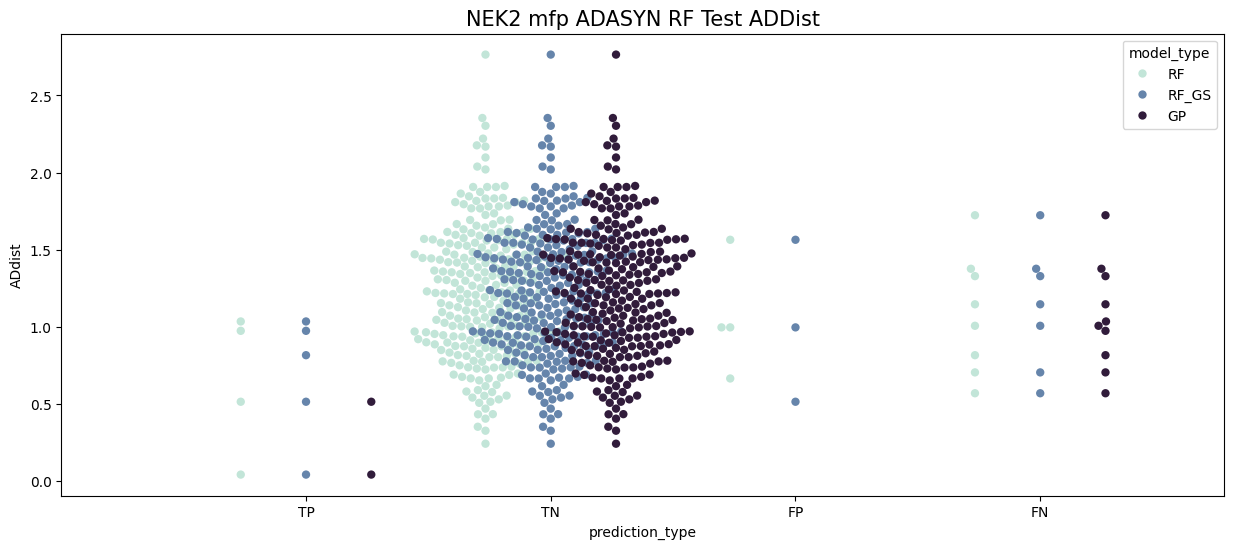

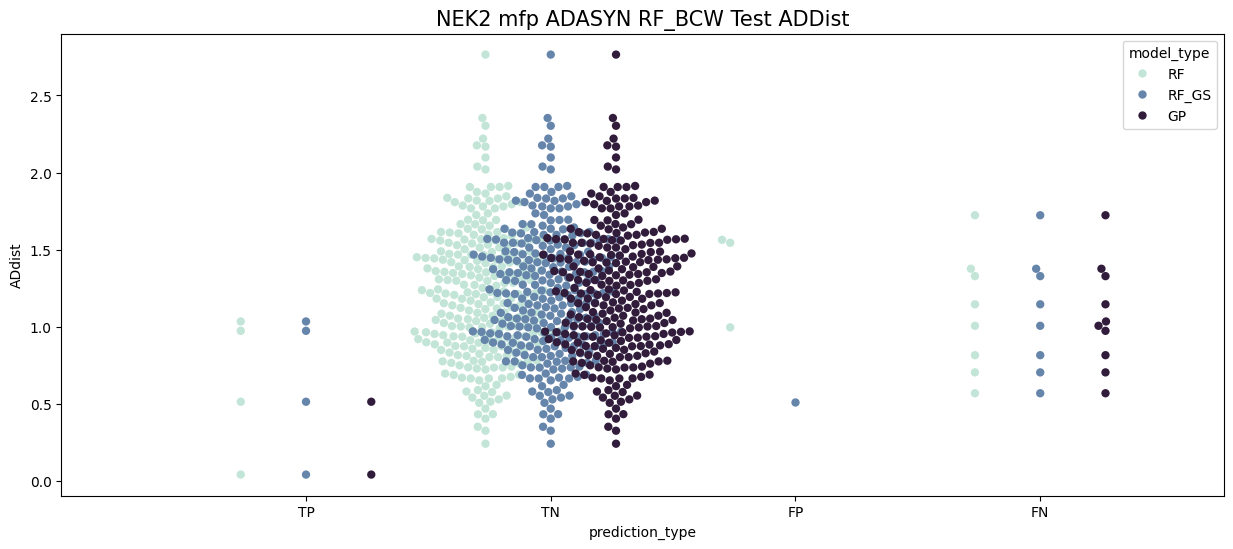

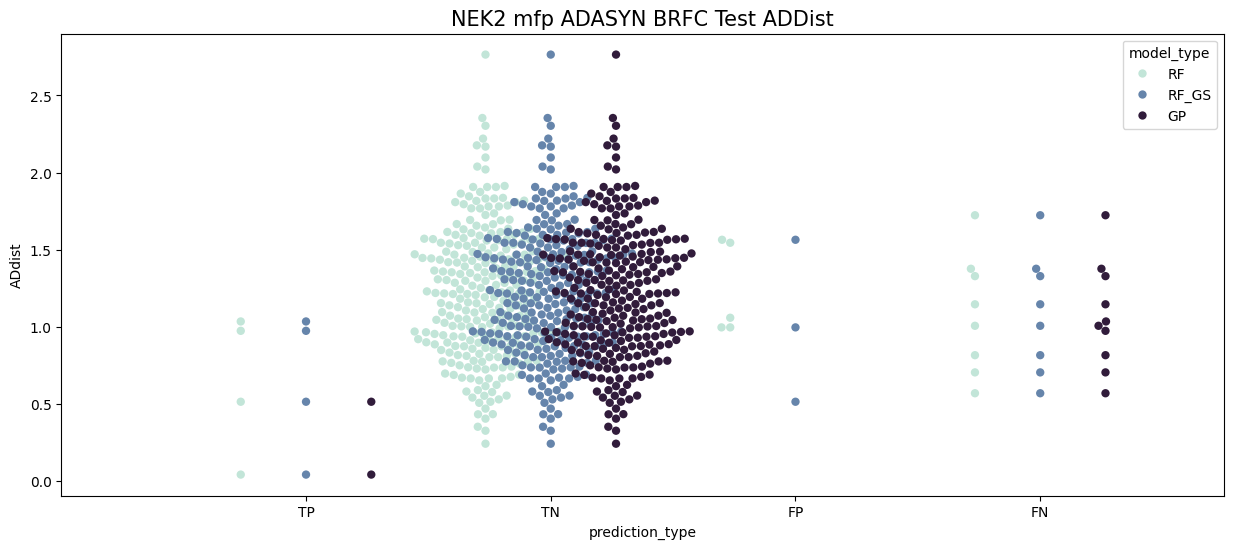

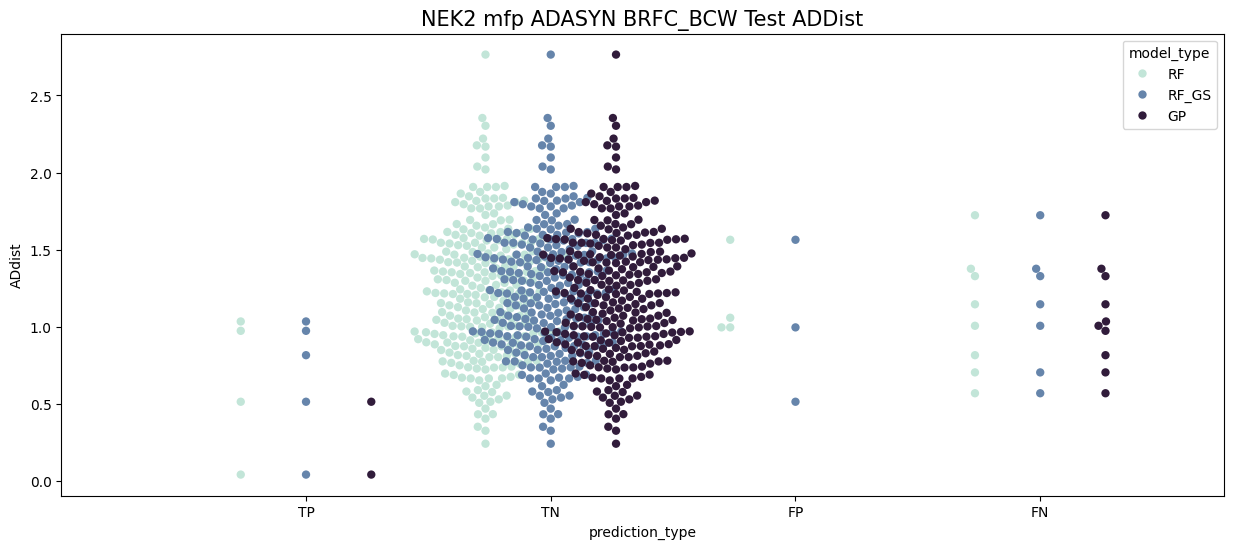

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

In [28]:
# neks = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
GPpath= '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/GP/GP_results/'
RFpath = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/RF/RF_results/'
RFGSpath = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/RF/RF_grid_search/rf_results/'
neks = ['2', '3', '5', '9']
feat_types = ['moe', 'mfp']
samplings = ['scaled', 'UNDER', 'SMOTE', 'ADASYN']
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# model_types = ['GP', 'RF', 'RF_GS']
RF_types = ['RF', 'RF_BCW', 'BRFC', 'BRFC_BCW']
k=7
col_names = ['prediction_type', 'ADdist', 'model_type']
# model_palette = sns.color_palette("Set2", n_colors=3)
model_palette = sns.cubehelix_palette(start=.5, rot=-.5, n_colors=3)
category_order = ['TP', 'TN', 'FP', 'FN']
for n in neks: 
    for feat in feat_types: 
        for samp in samplings: 
            df_path = f'/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/NEK{n}/bind/'
            full_df = pd.read_csv(f'{df_path}NEK{n}_binding_{feat}_{samp}_df.csv') 
            train_df = full_df[full_df['subset'] == 'train'].select_dtypes(include=numerics).drop(columns=['active'])
            test_df = full_df[full_df['subset'] == 'test'].select_dtypes(include=numerics).drop(columns=['active'])
            test_dist = calc_AD_kmean_dist(train_df, test_df, k)
            train_dist = calc_AD_kmean_dist(train_df, train_df, k)
            gp_results = pd.read_csv(f'{GPpath}NEK{n}_binding_{feat}_{samp}_test_GP.csv')
            for rf in RF_types: 
                rf_results = pd.read_csv(f'{RFpath}NEK{n}_binding_{feat}_{samp}_{rf}_test.csv')
                rfGS_results = pd.read_csv(f'{RFGSpath}NEK{n}_binding_{feat}_{samp}_{rf}_GS_test.csv')
                gp_results['ADdist'] = test_dist
                rf_results['ADdist'] = test_dist
                rfGS_results['ADdist'] = test_dist 
                rf_results['model_type'] = 'RF'
                rfGS_results['model_type'] = 'RF_GS'
                gp_results['model_type'] = 'GP'
                gp_results=gp_results[col_names]
                rf_results=rf_results[col_names]
                rfGS_results=rfGS_results[col_names]
                
                
                df = pd.concat([rf_results, rfGS_results, gp_results])
                plt.figure(figsize=(15, 6))
                g1 = sns.swarmplot(x='prediction_type', y='ADdist', data=df,dodge=True,hue='model_type',size=6,order=category_order, palette=model_palette) # this was the best so far
                if (samp=='scaled'): 
                    samp = 'raw' 
                
                plt.title(f'NEK{n} {feat} {samp} {rf} Test ADDist', fontsize=15) 
                path2 = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/plots/AD/figures/AD_GP_RF_RFGS_comparison/'
                # plt.savefig(f'{path2}NEK{n}_{feat}_{samp}_ADDist_{rf}_comparison_all.png')
                if (samp=='raw'): 
                    samp = 'scaled' 
                
                plt.xlim(-1, 3.75)
                
                plt.show();
                 

In [29]:
k=7

df_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/NEK2/bind/'
full_df = pd.read_csv(df_path+'NEK2_binding_moe_UNDER_df.csv')
train_df = full_df[full_df['subset'] == 'train'].select_dtypes(include=numerics).drop(columns=['active'])
test_df = full_df[full_df['subset'] == 'test'].select_dtypes(include=numerics).drop(columns=['active'])
test_dist = calc_AD_kmean_dist(train_df, test_df, k)
print("test length: ",len(test_dist))
train_dist = calc_AD_kmean_dist(train_df, train_df, k)
print("train length: ",len(train_dist))


test length:  283
train length:  90


In [ ]:
gp_results = pd.read_csv(GPpath+'NEK2_binding_moe_UNDER_test_GP.csv')
rf_results1 = pd.read_csv(RFpath+'NEK2_binding_moe_UNDER_RF_test.csv')
rfgs_results1 = pd.read_csv(RFGSpath+'NEK2_binding_moe_UNDER_RF_GS_test.csv')
gp_results['ADdist'] = test_dist
rf_results1['ADdist'] = test_dist
rfgs_results1['ADdist'] = test_dist 
rf_results1['model_type'] = 'RF'
rfgs_results1['model_type'] = 'RF_GS'
gp_results['model_type'] = 'GP'

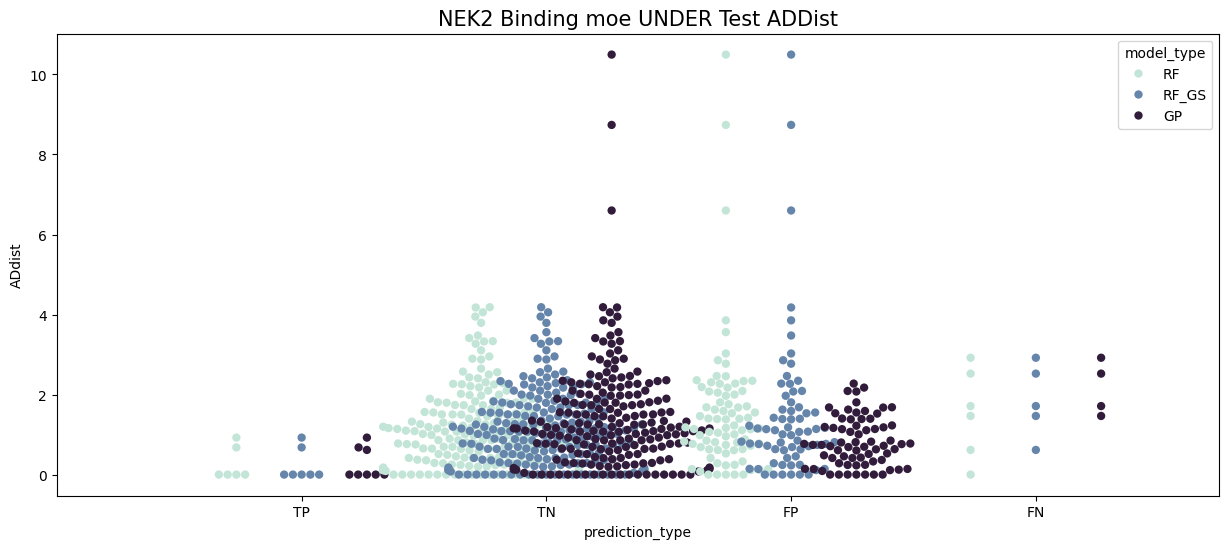

In [186]:
true_labels = full_df[full_df['subset']=='test']['active'].to_numpy()
model_palette = sns.cubehelix_palette(start=.5, rot=-.5, n_colors=3)
# GP_predictions = gp_results['y_pred'].to_numpy()
# RF_predictions = rf_results1['prediction'].to_numpy()
# RFGS_predictions=rfgs_results1['prediction'].to_numpy()
test1 = rf_results1[['prediction_type', 'ADdist', 'model_type']]
test2 = rfgs_results1[['prediction_type', 'ADdist', 'model_type']]
test3 = gp_results[['prediction_type', 'ADdist', 'model_type']]
result_df=pd.concat([test1, test2,test3])
# result_df = pd.concat([rf_results1[['prediction_type', 'ADdist', 'model_type']], rfgs_results1[['prediction_type', 'ADdist' ,'model_type']], gp_results[['prediction_type', 'ADdist' ,'model_type']]])
# sns.stripplot(x='prediction_type', y='ADdist', hue='model_type', data=result_df,dodge=True)
plt.figure(figsize=(15, 6))
g1 = sns.swarmplot(x='prediction_type', y='ADdist', data=result_df,dodge=True,hue='model_type',size=6,order=category_order, palette=model_palette) # this was the best so far 
# scatter = sns.scatterplot(data=result_df, x='prediction_type', y='ADdist',style = 'model_type',markers=['v','^','*'], hue='model_type')
plt.title('NEK2 Binding moe UNDER Test ADDist', fontsize=15) 
# plt.savefig('NEK2_binding_moe_UNDER_ADdist_GP_RF_RFGS.png')
plt.xlim(-1, 3.75)

plt.show();

In [30]:
prob_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/RF/RF_results/proba_dfs/'

prob_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/RF/RF_results/proba_dfs/'
moe_pred = pd.read_csv(f'{RFpath}NEK2_binding_moe_UNDER_RF_test.csv')
# mfp_pred = pd.read_csv(f'{result_path}{nek}_mfp_{samp}_{rf}_test.csv')
stdprobs = pd.read_csv(f'{prob_path}NEK2_binding_std_prob_UNDER_RF.csv')
std0_moe = stdprobs['std0_moe']
std1_moe = stdprobs['std1_moe']
std0_mfp = stdprobs['std0_mfp']
std1_mfp  = stdprobs['std1_mfp']
rf_results1 = rf_results1[['prediction_type', 'ADdist', 'model_type']]
rf_results1['std0'] = std0_moe
rf_results1['std1'] = std1_moe


# moe_df = get_swarm_data(moe_pred['prediction'].to_numpy(), moe_pred['y'].to_numpy(), std1_moe.to_numpy(), std0_moe.to_numpy(), 'moe')
# mfp_df = get_swarm_data(mfp_pred['prediction'].to_numpy(), mfp_pred['y'].to_numpy(), std1_mfp.to_numpy(), std0_mfp.to_numpy(), 'mfp')
# df = pd.concat([moe_df, mfp_df])

# title = f'{nek} {samp} {rf} std prob'
# plot_swarm_std_prob_RF(df, figure_path, title)
            

In [47]:
nek_names = [] 
all_feats = [] 
sampling_types = [] 
test_dists = []

for n in neks: 
    for feat in ['moe','mfp']: 
        for samp in samplings: 
            df_path = f'/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/NEK{n}/bind/'
            full_df = pd.read_csv(f'{df_path}NEK{n}_binding_{feat}_{samp}_df.csv') 
            
            train_df = full_df[full_df['subset'] == 'train'].select_dtypes(include=numerics).drop(columns=['active'])
            test_df = full_df[full_df['subset'] == 'test'].select_dtypes(include=numerics).drop(columns=['active'])
            
            test_dist = calc_AD_kmean_dist(train_df, test_df, k)
            train_dist = calc_AD_kmean_dist(train_df, train_df, k)
            if samp == 'scaled': 
                adjusted_samp = 'raw'
            else:
                adjusted_samp = samp
            
            test_dists.append(test_dist) 
            nek_names.append(f'NEK{n}_binding')
            all_feats.append(feat) 
            sampling_types.append(adjusted_samp)
            
            if n == '2' or n == '9': 
                df_path = f'/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/NEK{n}/inhib/'
                full_df = pd.read_csv(f'{df_path}NEK{n}_inhibition_{feat}_{samp}_df.csv') 
                
                train_df = full_df[full_df['subset'] == 'train'].select_dtypes(include=numerics).drop(columns=['active'])
                test_df = full_df[full_df['subset'] == 'test'].select_dtypes(include=numerics).drop(columns=['active'])
                
                test_dist = calc_AD_kmean_dist(train_df, test_df, k)
                train_dist = calc_AD_kmean_dist(train_df, train_df, k)
                if samp == 'scaled': 
                    adjusted_samp = 'raw'
                else:
                    adjusted_samp = samp
                
                test_dists.append(test_dist) 
                nek_names.append(f'NEK{n}_inhibition')
                all_feats.append(feat) 
                sampling_types.append(adjusted_samp)


In [51]:
all_feats

['moe',
 'moe',
 'moe',
 'moe',
 'moe',
 'moe',
 'moe',
 'moe',
 'mfp',
 'mfp',
 'mfp',
 'mfp',
 'mfp',
 'mfp',
 'mfp',
 'mfp',
 'moe',
 'moe',
 'moe',
 'moe',
 'mfp',
 'mfp',
 'mfp',
 'mfp',
 'moe',
 'moe',
 'moe',
 'moe',
 'mfp',
 'mfp',
 'mfp',
 'mfp',
 'moe',
 'moe',
 'moe',
 'moe',
 'moe',
 'moe',
 'moe',
 'moe',
 'mfp',
 'mfp',
 'mfp',
 'mfp',
 'mfp',
 'mfp',
 'mfp',
 'mfp']

In [52]:
AD_df = pd.DataFrame({'NEK': nek_names,'strategy': sampling_types, 'feat_type':all_feats,'ADdist':test_dists})
AD_df['dataset_category'] = AD_df['feat_type'].astype(str) + '_'+AD_df['strategy']

# AD_df = AD_df[AD_df['feat_type'] =='moe'] 
moe_AD = AD_df['ADdist']
for val in moe_AD.values:
    print(min(val),max(val))
    print(f'range: {max(val) - min(val)}')
    # this_ad = val.flatten()
    # for ad in this_ad: 
    #     print(ad.max())

1e-06 7.83430358108456
range: 7.83430258108456
1e-06 8.989350013546224
range: 8.989349013546224
1e-06 10.49699378758791
range: 10.49699278758791
1e-06 7.437910117190523
range: 7.4379091171905225
1e-06 5.098471795500087
range: 5.098470795500087
1e-06 7.590439581750887
range: 7.590438581750887
1e-06 5.158288256251174
range: 5.158287256251174
1e-06 7.635334517938433
range: 7.635333517938433
1e-06 4.042604860122457
range: 4.0426038601224565
1e-06 5.576689014645535
range: 5.576688014645534
1e-06 6.820444294071766
range: 6.820443294071766
1e-06 5.717993476678267
range: 5.717992476678267
0.01931801502791062 2.7620062543025794
range: 2.7426882392746688
1e-06 3.491132630240512
range: 3.491131630240512
0.04268014691266911 2.7647502292404518
range: 2.722070082327783
1e-06 3.393111665152669
range: 3.393110665152669
1e-06 5.152579992274236
range: 5.152578992274236
1e-06 8.794498325465938
range: 8.794497325465938
1e-06 3.4329498472152924
range: 3.4329488472152923
1e-06 3.422967555741403
range: 3.422

In [53]:
AD_df['feat_type'].unique()

array(['moe', 'mfp'], dtype=object)

ValueError: No objects to concatenate

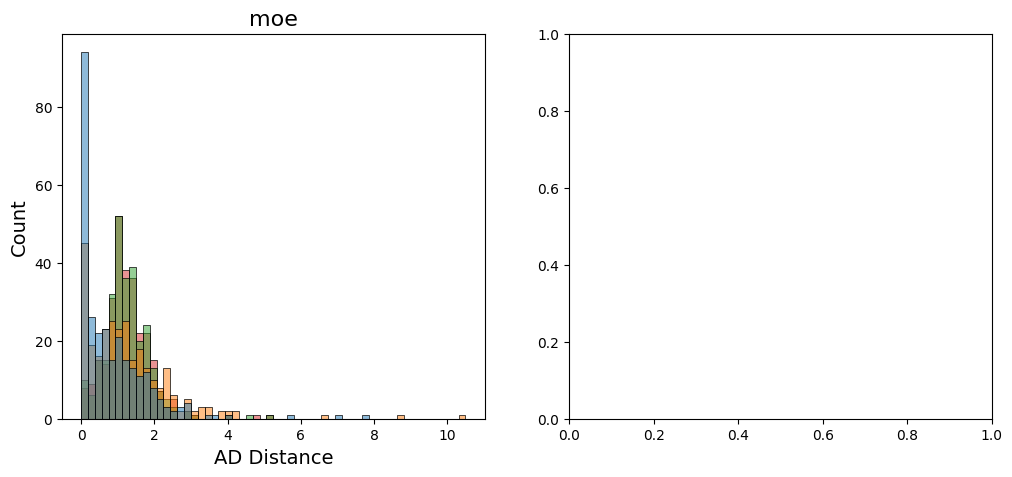

In [34]:
neks2 = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
for nek in neks2: 
    df = AD_df[AD_df['NEK'] == nek]
    df_flat = df.explode('ADdist')
    df_flat['ADdist'] = pd.to_numeric(df_flat['ADdist'])
    # df_flat['ADdist'] = pd.to_numeric(df_flat['ADdist'], errors='coerce')
    moe_df = df_flat[df_flat['feat_type'] == 'moe'] 
    mfp_df = df_flat[df_flat['feat_type'] == 'mfp'] 
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(data=moe_df, x='ADdist', hue='strategy', kde=False, ax=ax[0], legend=False)
    ax[0].set_title('moe',fontsize=16)
    ax[0].set_xlabel('AD Distance', fontsize=14)
    ax[0].set_ylabel('Count', fontsize=14)


    sns.histplot(data=mfp_df, x='ADdist', hue='strategy', kde=False, ax=ax[1], legend=False)
    ax[1].set_title('mfp',fontsize=16)
    ax[1].set_xlabel('AD Distance', fontsize=14)
    ax[1].set_ylabel('Count', fontsize=14)
    hues = list(moe_df['strategy'].unique())
    
    handles = [mlines.Line2D([],[], color=sns.color_palette()[i], label=hues[i]) for i in range(len(hues))]
    fig.legend(handles,hues, loc='upper right', bbox_to_anchor=(0.77, -0.008), ncol=4, fontsize=14)
    plt.suptitle(f'{nek} ADI Distribution', y=0.9, fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f'AD_distribution/{nek}_ADdist_hist.png', bbox_inches='tight')
    plt.show()

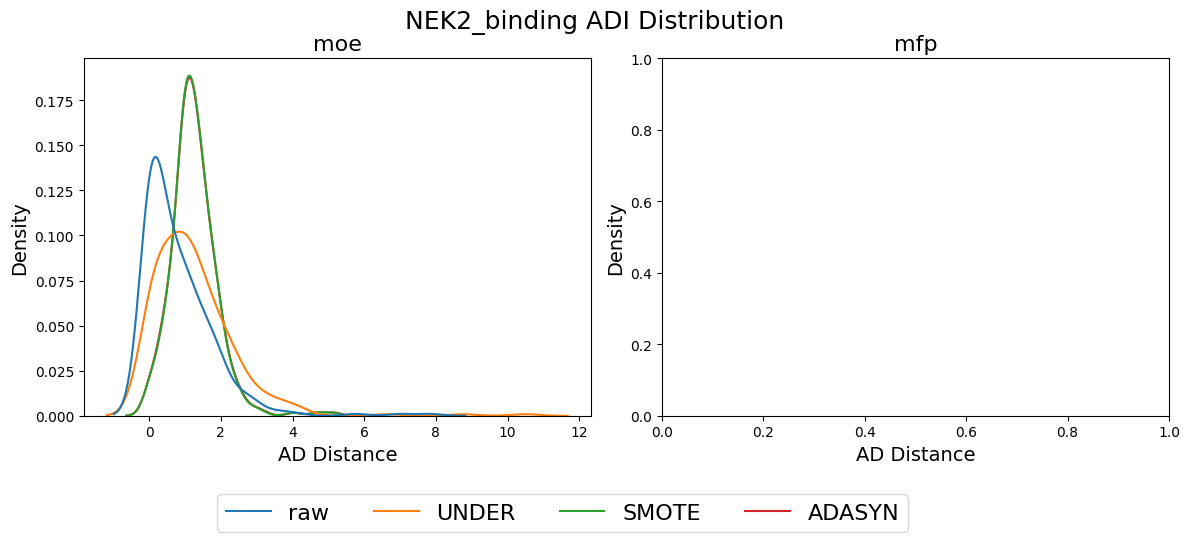

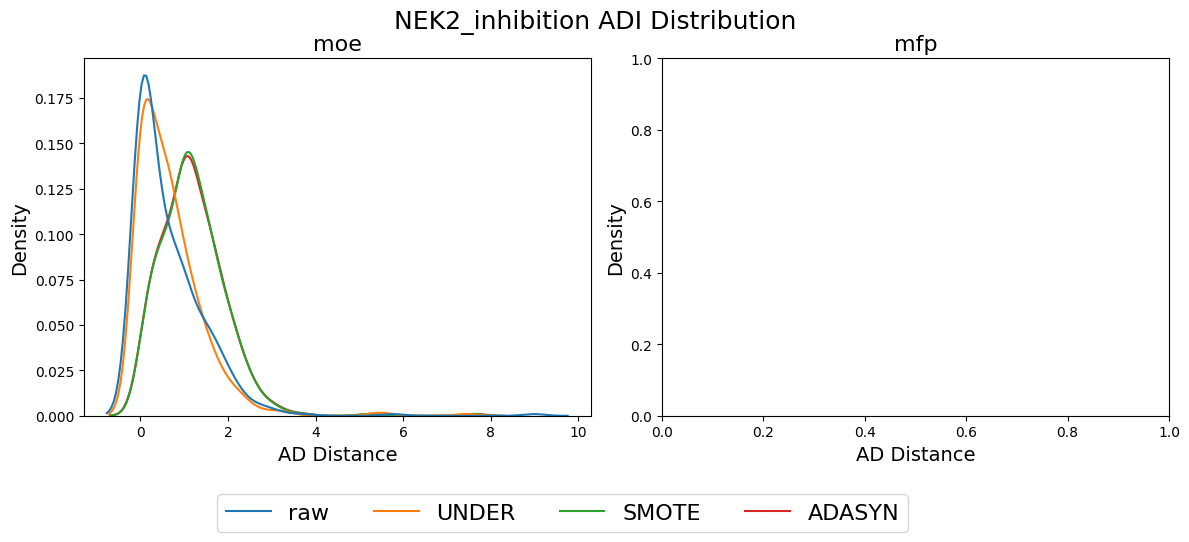

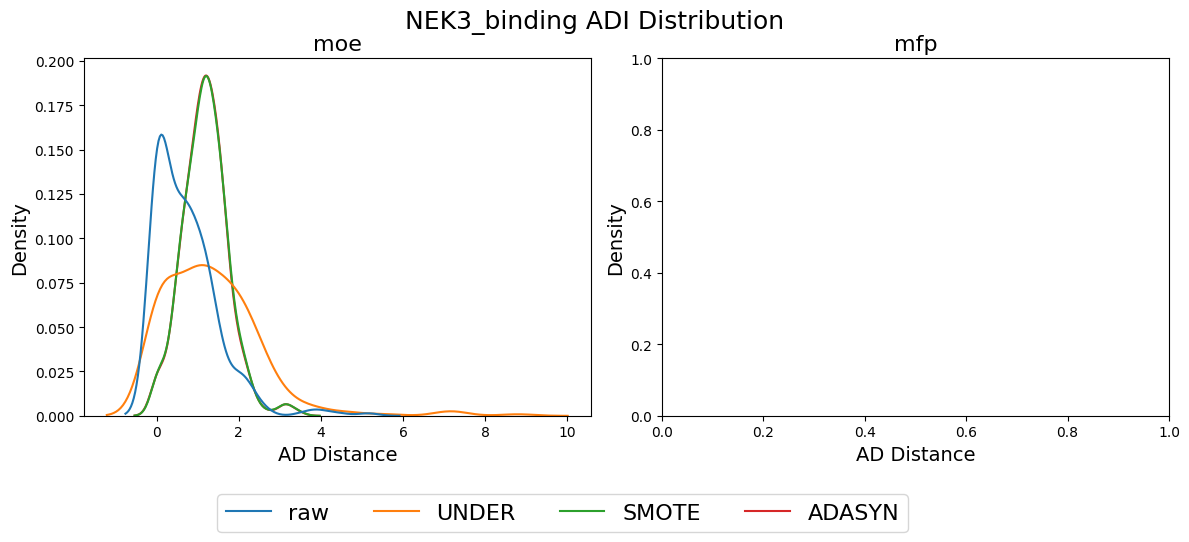

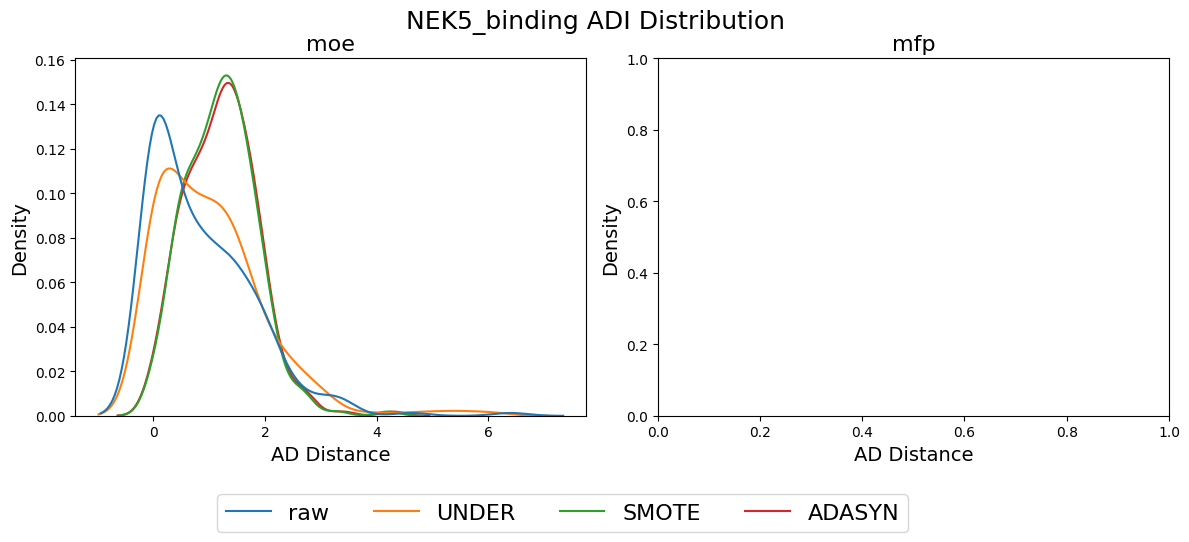

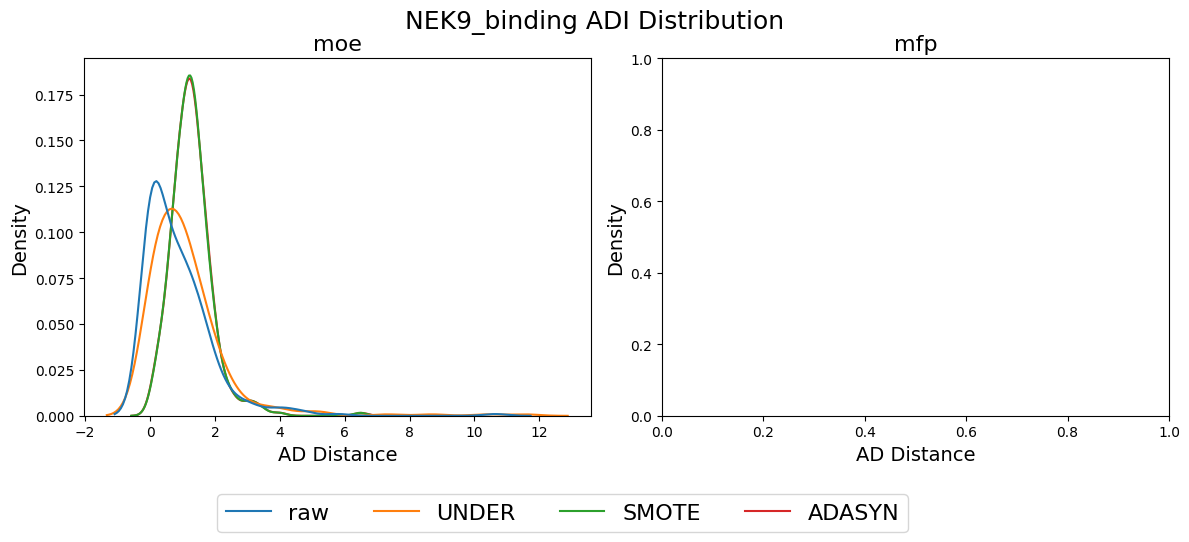

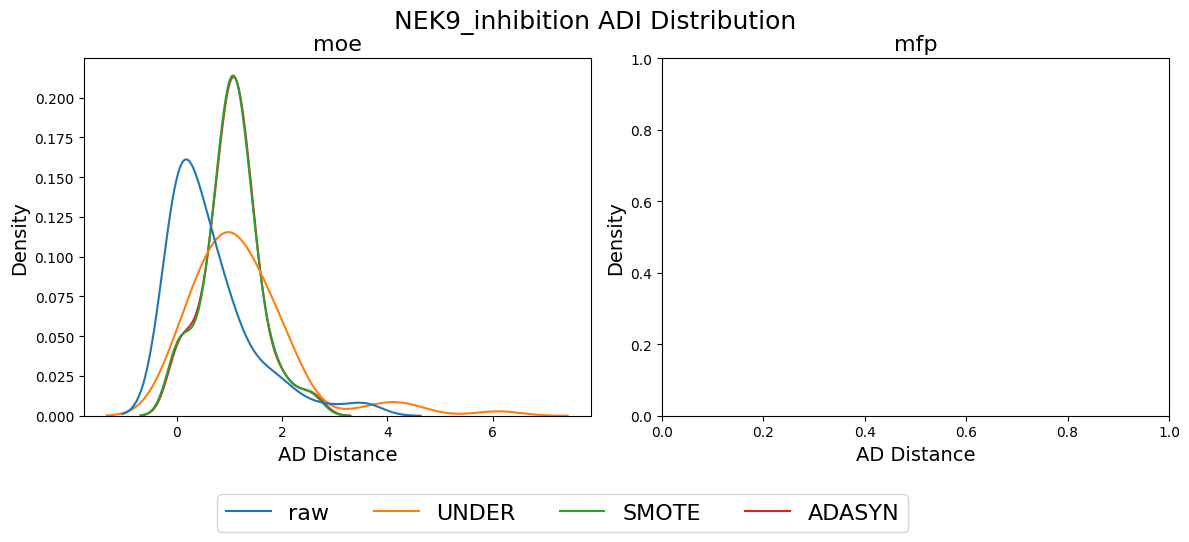

In [35]:
neks2 = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
for nek in neks2: 
    df = AD_df[AD_df['NEK']==nek]
    df_flat = df.explode('ADdist')

    df_flat['ADdist'] = pd.to_numeric(df_flat['ADdist'])
    moe_df = df_flat[df_flat['feat_type'] == 'moe'] 
    mfp_df = df_flat[df_flat['feat_type'] == 'mfp'] 
    fig, ax = plt.subplots(1,2, figsize=(12,5))

    sns.kdeplot(data=moe_df, x='ADdist', hue='strategy', ax=ax[0],legend=False)

    ax[0].set_title(f'moe',fontsize=16)
    ax[0].set_xlabel('AD Distance', fontsize=14)
    ax[0].set_ylabel('Density', fontsize=14)
    sns.kdeplot(data=mfp_df, x='ADdist', hue='strategy', ax=ax[1],legend=False)
    ax[1].set_title(f'mfp',fontsize=16)
    ax[1].set_xlabel('AD Distance', fontsize=14)
    ax[1].set_ylabel('Density', fontsize=14)
    hues = list(moe_df['strategy'].unique())

    handles = [mlines.Line2D([],[], color=sns.color_palette()[i], label=hues[i]) for i in range(len(hues))]
    fig.legend(handles,hues, loc='upper right', bbox_to_anchor=(0.77, -0.008), ncol=4,fontsize=16)
    plt.suptitle(f'{nek} ADI Distribution', y=0.94, fontsize=18)
    plt.tight_layout()
    # plt.savefig(f'AD_distribution/{nek}_ADdist_kde.png', bbox_inches='tight')
    plt.show();

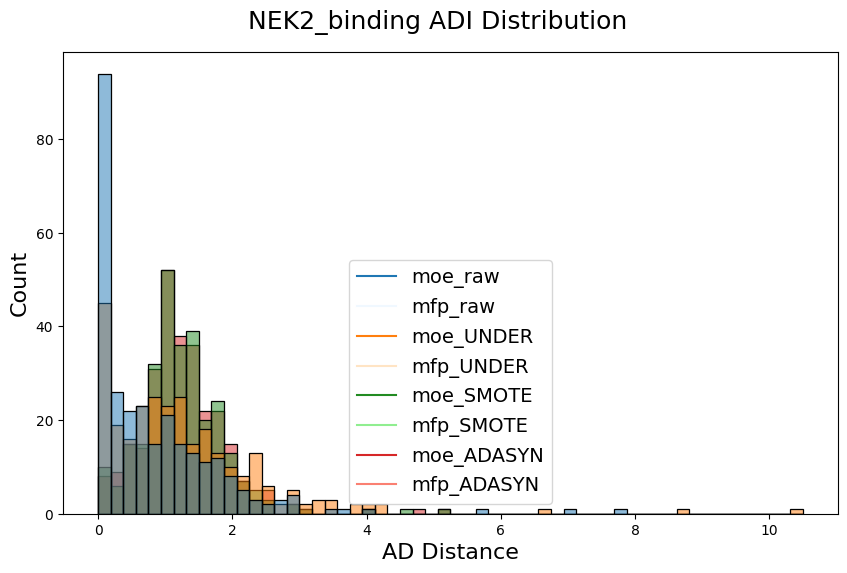

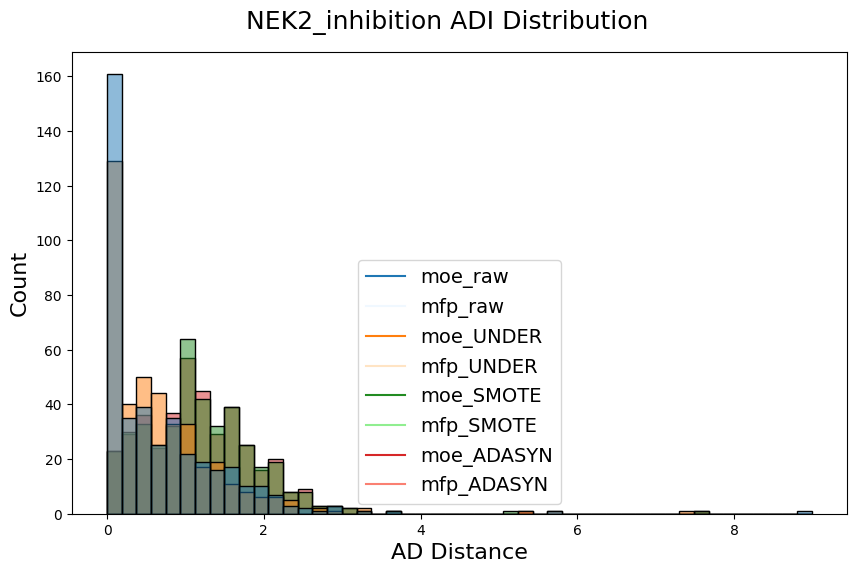

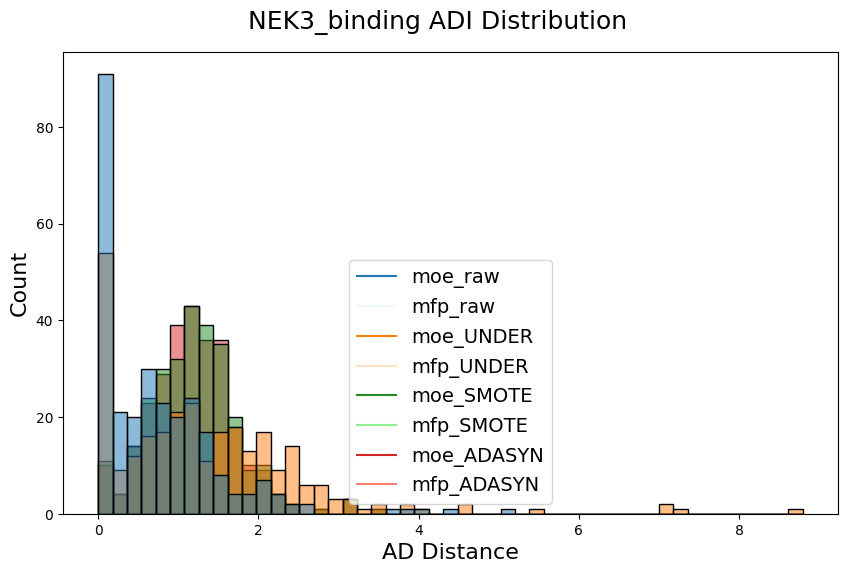

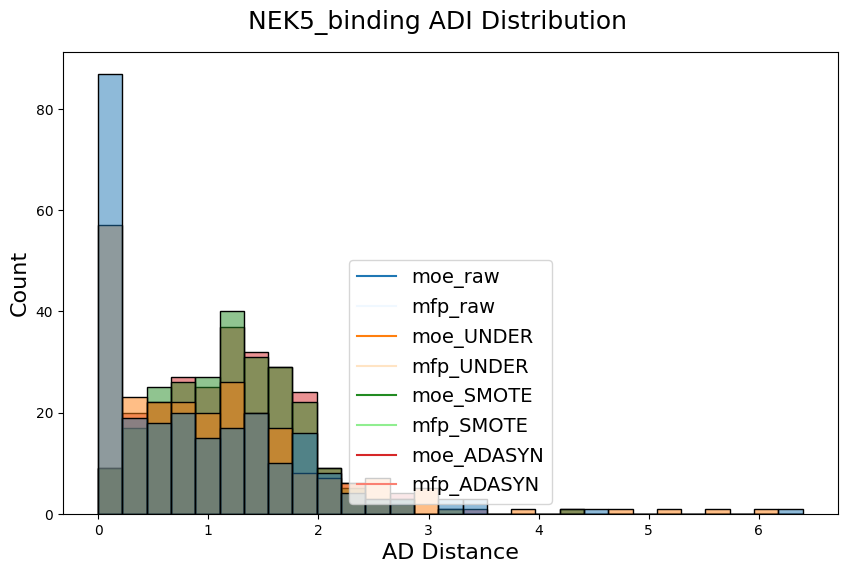

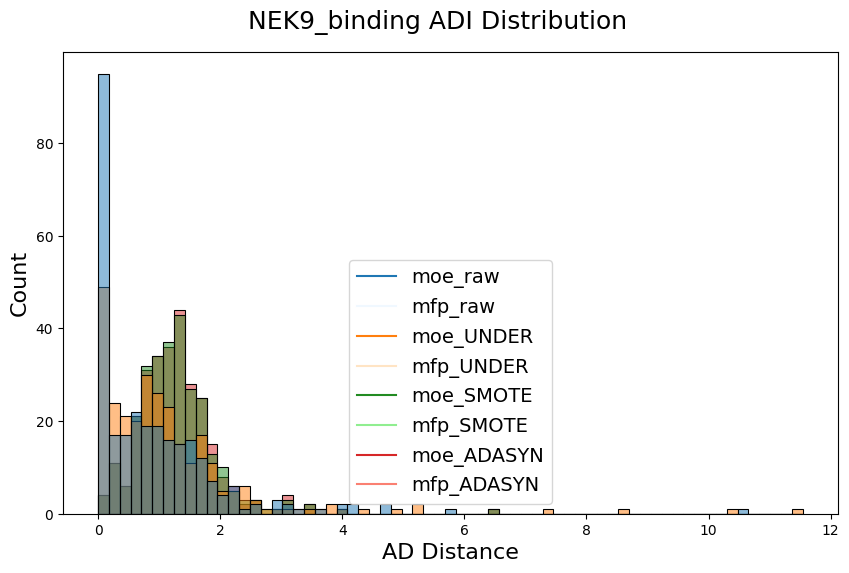

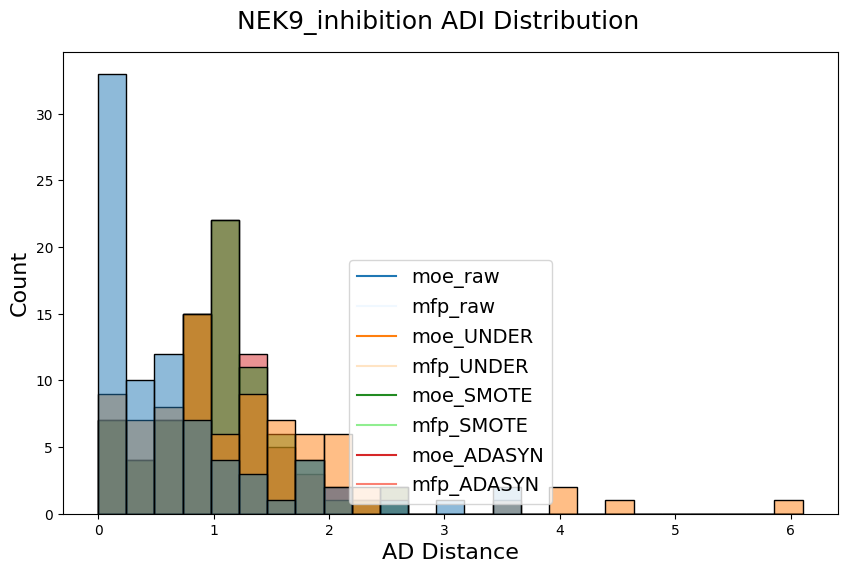

In [36]:
dataset_colors = {'moe_raw': 'tab:blue', 'moe_UNDER': 'tab:orange', 'moe_SMOTE': 'forestgreen', 'moe_ADASYN': 'tab:red', 
    'mfp_raw': 'aliceblue', 'mfp_UNDER': 'bisque','mfp_SMOTE': 'lightgreen', 'mfp_ADASYN': 'salmon'}
dataset_order = ['moe_raw', 'mfp_raw', 'moe_UNDER','mfp_UNDER','moe_SMOTE','mfp_SMOTE','moe_ADASYN','mfp_ADASYN']
for nek in neks2: 
    df = AD_df[AD_df['NEK'] == nek].copy()
    df_flat = df.explode('ADdist')
    df_flat['ADdist'] = pd.to_numeric(df_flat['ADdist'])
    df_flat['dataset_category'] = df_flat['feat_type'].astype(str)+'_'+df['strategy'] 
    df_flat = df_flat.sort_values('strategy')
    hues = df_flat['dataset_category'].unique()
    plt.figure(figsize=(10,6))
    sns.histplot(data=df_flat, x='ADdist', hue='dataset_category', kde=False, palette=dataset_colors, legend=False,hue_order=dataset_order)
    handles = [mlines.Line2D([], [], color=dataset_colors[val], label=val) for val in dataset_order]

  
    # plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(0.4, -0.02), ncol=4, fontsize=14)
    plt.legend(handles=handles, loc='lower center',fontsize=14)
    plt.suptitle(f'{nek} ADI Distribution', y=0.95, fontsize=18)
    # plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.ylabel('Count', fontsize=16)
    plt.xlabel('AD Distance', fontsize=16)
    # plt.savefig(f'AD_distribution/{nek}_ADdist_hist_onefig.png')

    plt.show();


In [56]:
AD_df['strategy'].value_counts()

strategy
raw       12
UNDER     12
SMOTE     12
ADASYN    12
Name: count, dtype: int64

# removing SMOTE and changing ADASYN to green 

In [60]:
dataset_colors_noSMOTE = {'moe_raw': 'tab:blue', 'moe_UNDER': 'tab:orange', 'moe_ADASYN': 'forestgreen',
    'mfp_raw': 'aliceblue', 'mfp_UNDER': 'bisque','mfp_ADASYN': 'lightgreen'}
dataset_order_noSMOTE = ['moe_raw', 'mfp_raw', 'moe_UNDER','mfp_UNDER','moe_ADASYN','mfp_ADASYN']

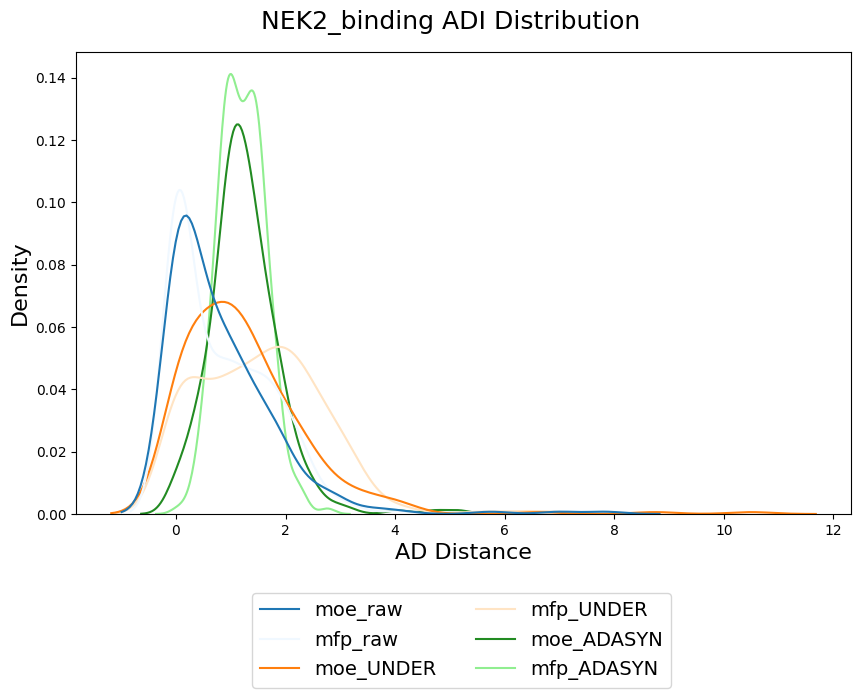

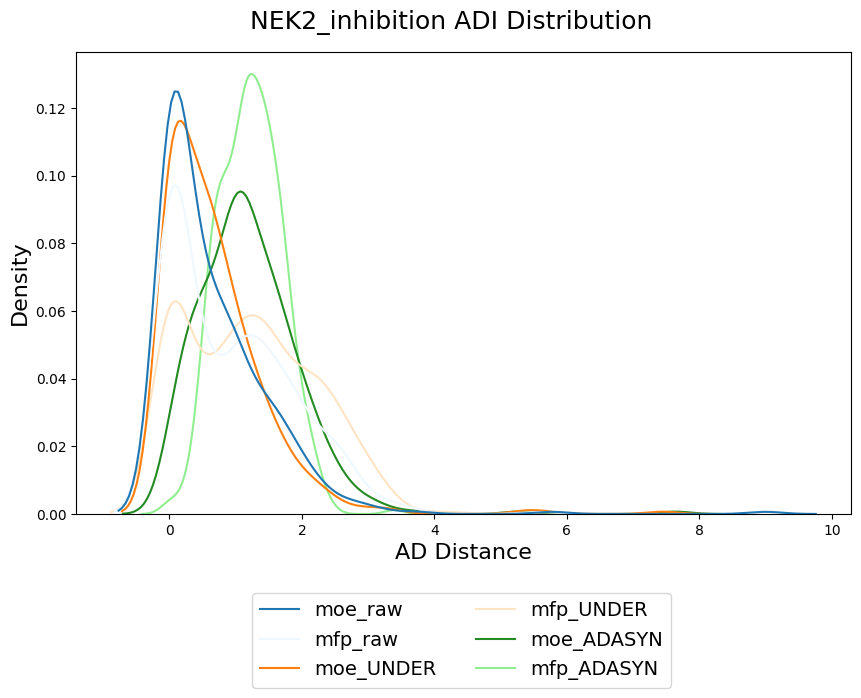

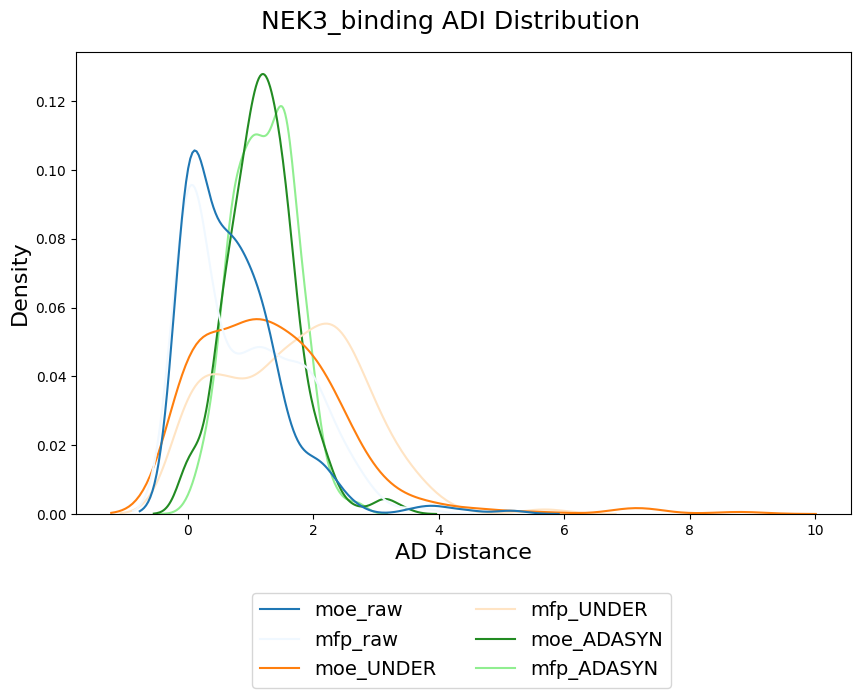

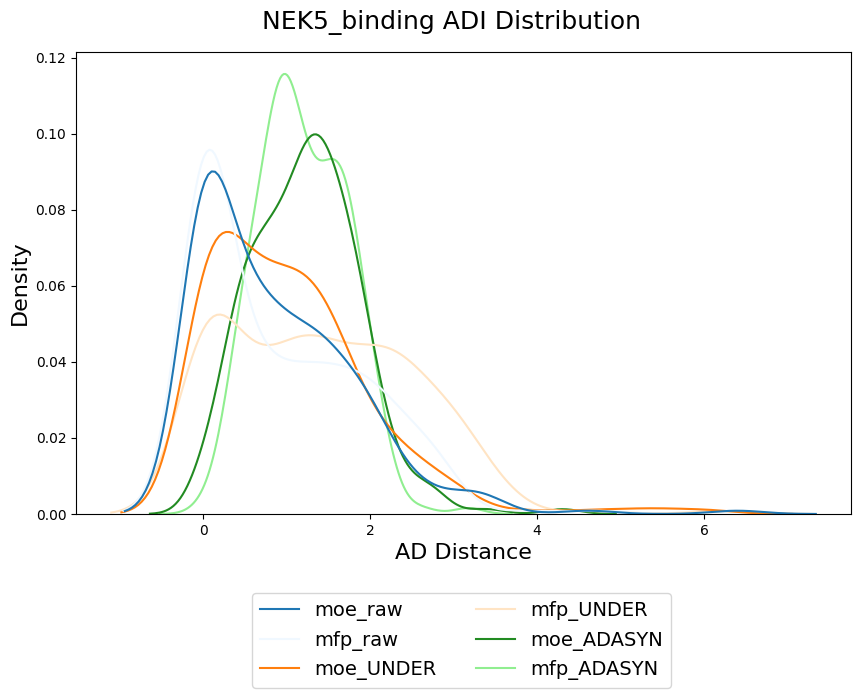

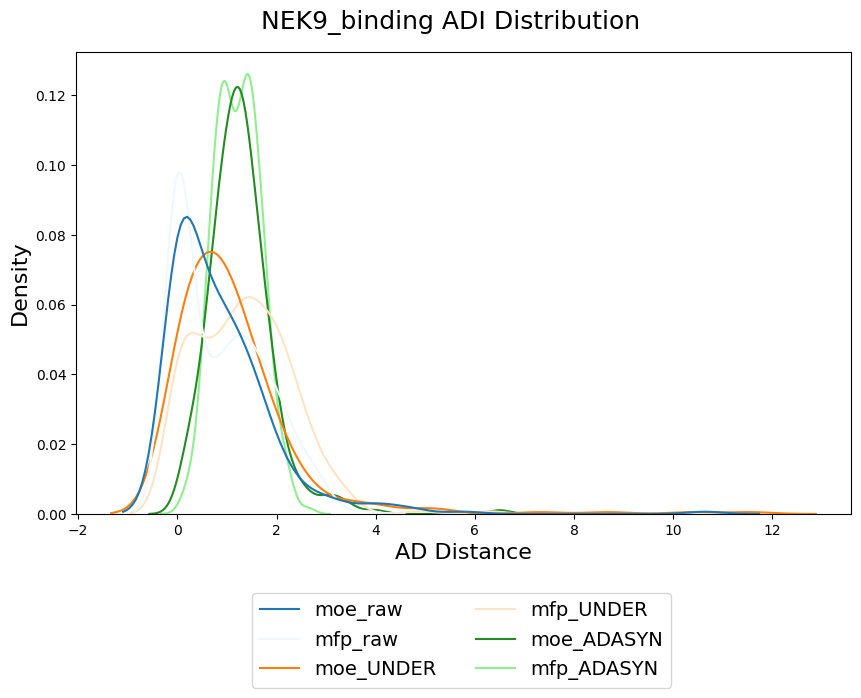

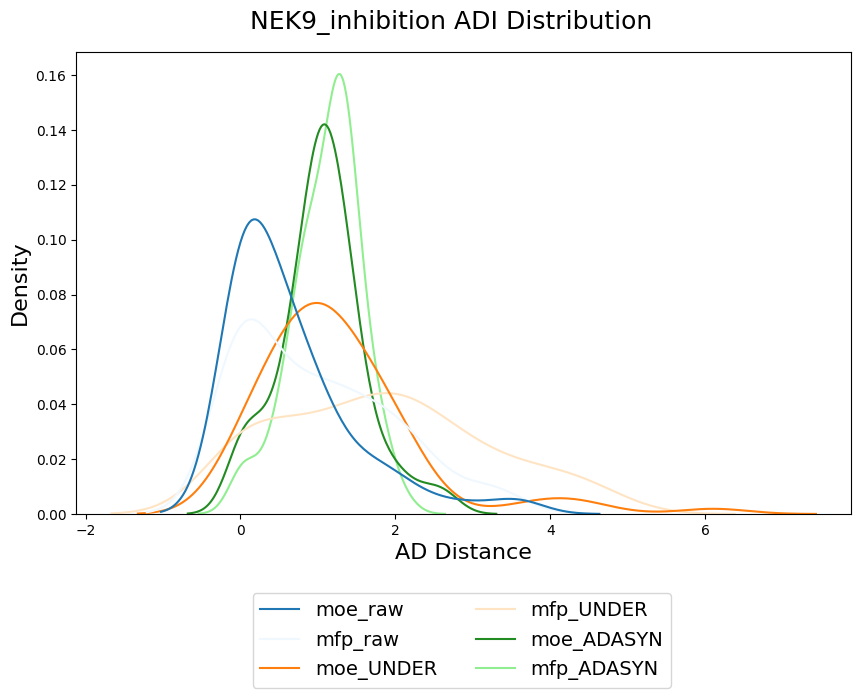

In [62]:
neks2 = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
AD_noSMOTE = AD_df[AD_df['strategy']!='SMOTE']
for nek in neks2: 
 
    df = AD_noSMOTE[AD_noSMOTE['NEK'] == nek].copy()

    
    df_flat = df.explode('ADdist')
    df_flat['ADdist'] = pd.to_numeric(df_flat['ADdist'])
    df_flat['dataset_category'] = df_flat['feat_type'].astype(str)+'_'+df['strategy'] 
    df_flat = df_flat.sort_values('strategy')
    plt.figure(figsize=(10,6))

    sns.kdeplot(data=df_flat, x='ADdist', hue='dataset_category', palette=dataset_colors_noSMOTE, legend=False,hue_order=dataset_order_noSMOTE)
    handles = [mlines.Line2D([], [], color=dataset_colors_noSMOTE[val], label=val) for val in dataset_order_noSMOTE]

    plt.legend(handles=handles, bbox_to_anchor=(0.78, -.15),loc='upper right',fontsize=14,ncols=2) # underneath 
    # plt.legend(handles=handles, bbox_to_anchor=(1.3,.64),loc='upper right',fontsize=14,ncols=2) # on the right 
    plt.suptitle(f'{nek} ADI Distribution', y=0.95, fontsize=18)
    # plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.ylabel('Density', fontsize=16)
    plt.xlabel('AD Distance', fontsize=16)
    plt.savefig(f'AD_distribution/{nek}_ADdist_kde_onefig.png',bbox_inches='tight')

    plt.show();


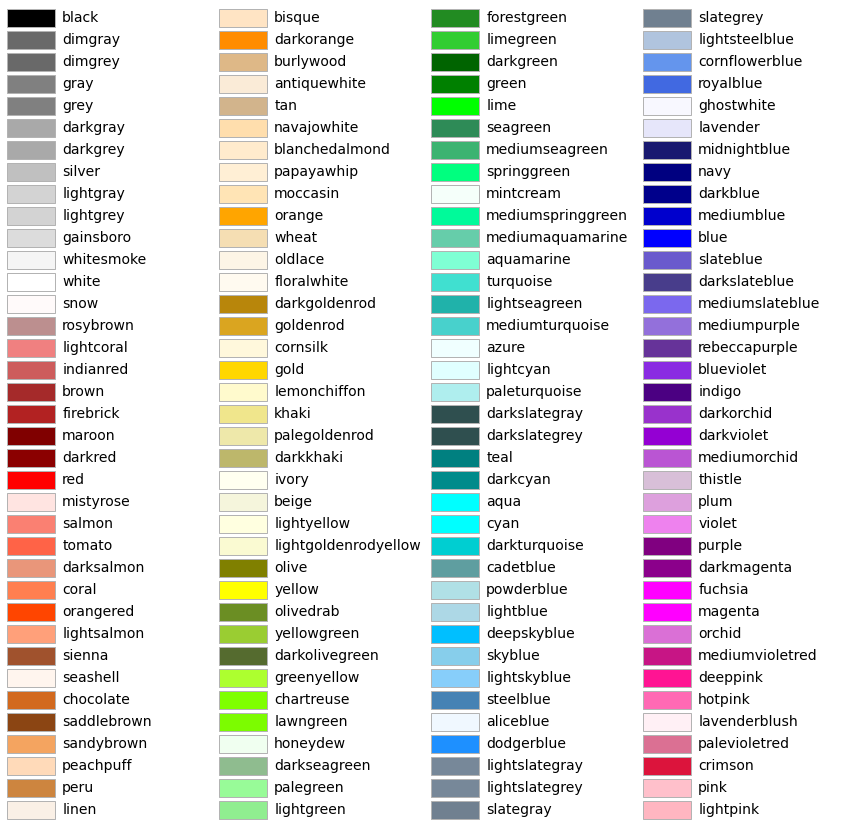

In [195]:
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig
plot_colortable(mcolors.CSS4_COLORS)
plt.show()